In [1]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline
from skimage import transform,io
import glob

In [2]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [3]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
# output_nodes = 10
# summer 12 + winter 12 + other 1
output_nodes = 24

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [4]:
train_dataset = []
for image_file_name in glob.glob('./DATA/TRAIN/*/*'):
    # print(image_file_name)
    line = str(image_file_name[13:])
    line = line[:line.find('/')]
    # print(line)
    if line  == "FRONTNANAMEFIT": label = 0
    elif line  == "FRONTTATEFAR": label = 1
    elif line  == "FRONTTATEFITBOTTOM": label = 2
    elif line  == "FRONTTATEFITCENTER": label = 3
    elif line  == "FRONTTATEFITLEFT": label = 4
    elif line  == "FRONTTATEFITRIGHT": label = 5
    elif line  == "FRONTTATEFITTOP": label = 6
    elif line  == "FRONTTATEJUSTCENTER": label = 7
    elif line  == "FRONTTATENEAR": label = 8
    elif line  == "FRONTYOKOFAR": label = 9
    elif line  == "FRONTYOKOFIT": label = 10
    elif line  == "NANAMETATEFIT": label = 11
    elif line  == "WINTERFRONTNANAMEFIT": label = 12
    elif line  == "WINTERFRONTTATEFAR": label = 13
    elif line  == "WINTERFRONTTATEFITBOTTOM": label = 14
    elif line  == "WINTERFRONTTATEFITCENTER": label = 15
    elif line  == "WINTERFRONTTATEFITLEFT": label = 16
    elif line  == "WINTERFRONTTATEFITRIGHT": label = 17
    elif line  == "WINTERFRONTTATEFITTOP": label = 18
    elif line  == "WINTERFRONTTATEJUSTCENTER": label = 19
    elif line  == "WINTERFRONTTATENEAR": label = 20
    elif line  == "WINTERFRONTYOKOFAR": label = 21
    elif line  == "WINTERFRONTYOKOFIT": label = 22
    elif line  == "WINTERNANAMETATEFIT": label = 23
    # else: label = 24
    else: continue
    #print(label)
    img = transform.resize(io.imread(image_file_name, as_gray=True), (28, 28), mode='symmetric', preserve_range=True)
    # matplotlib.pyplot.imshow(img, cmap='Greys', interpolation='None')
    img_data = img.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    # print(numpy.min(img_data))
    # print(numpy.max(img_data))
    record = numpy.append(label,img_data)
    train_dataset.append(record)
    print(str(len(train_dataset) - 1) + ", " + str(label) + ", " + image_file_name)
    pass

0, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/62a2e78a7dd45a99b9c89de9c7252ca5eee83d98_224_70.jpg
1, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/c6aaf42849f3acb19d7b0108103f993cb3816901_224_70.jpg
2, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/dba2530590eeec7899e2578368c82b12900de43f_224_70.jpg
3, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/d2eeae615e3f1a8366bd6dc32cee2f750520bf39_224_70.jpg
4, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/8a772393eb39161ad838d06d94b6c3d4d32e6461_224_70.jpg
5, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/dec9777441be8a2380203690dec54db6f5494bfe_224_70.jpg
6, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/fbc6b7e4ed6695bf22aad4ed08cf3219969469b6_R90_TCC60_RESIZED.jpg
7, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/26d2608de85039fdbd038e598fc83563af2026bc_224_70.jpg
8, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/d99ff204b773f795919b4d1bdb910af6f7a94cc3_224_70.jpg
9, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/a8701fe5992fa939df826085308cb7839d1a4d2a_224_70.jpg
10, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/f8ed80c3a77210e2e2b1440dc2fc5019b634cdba_TCC80_RES

93, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/a3ba98576a0241065921a443198fa0626ce343cc_224_70.jpg
94, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/43458ae7e00ea45e14c673fc2568de66bf21dbf6_224_70.jpg
95, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/46fc992b50066b602cd20336d209481f85922859_224_70.jpg
96, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/1b44e6127eae19aaa12dfa19d3e10c155e172279_224_70.jpg
97, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/826992d256c0bd335f185313359f3f863d0357c6_224_70.jpg
98, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/c5db9537efc65f5e06e4017b1d3ebb4a3e7590f7_224_70.jpg
99, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/64eda1498d13634fe3440f3be1302dfcc07bedca_224_70.jpg
100, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/d9fff3e7ab9a4cd06dafb2526ccbdcfbabd99a60_224_70.jpg
101, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/3a14392de7ad8d8d743e5cf4a9a1687104f32bc9_224_70.jpg
102, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/bb0d8b553cf55bb7c8ccf4a2e2d598e9fb7c3f31_R90_TCC60_RESIZED.jpg
103, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/7d668e660bf015e5c047e7f9f22cf571b349

200, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/68d9ce77df2b37cc54cbb1dd83213dfd5c013942_224_70.jpg
201, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/408333c672928cad5d6d3dac7a0d0ff6390b6eca_TCC60_RESIZED.jpg
202, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/502b29732ce65ccde7b64d1a49c75f207666bebc_TCC40_RESIZED.jpg
203, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/6b4ce88ef431657b643a66dc060ff731a763a3e6_224_70.jpg
204, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/1fbb47d8eee80ecf68c0948687ff4d0686a518f1_224_70.jpg
205, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/713c72f2fe858ee282bc21b8afd6c078d2da9c1c_224_70.jpg
206, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/d31ac373ae327ea54ae7decf0c7bb57b2c197076_TCC80_RESIZED.jpg
207, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/74ce4269938d4187470774866b301d7eb26c64d8_R90_TCC60_RESIZED.jpg
208, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/edb1c5223f6a8d9fb855ce1afb893047d6446564_224_70.jpg
209, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/ada16b5f36c37779f774d9e5ba55d37afc05b3b5_224_70.jpg
210, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/b01adaf4

287, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/0dbd122f6a0bca6a2ac55c122f96d403dc09d9d5_224_70.jpg
288, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/e83dfc37d1ab65ade3d0d2f82c3cff157f8e4632_224_70.jpg
289, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/038abd20e38b0925d608d4c11eedc6fe6e5c2355_224_70.jpg
290, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/ee57b50827bf82b59f3bc6e012a129cbe918c795_TCC80_RESIZED.jpg
291, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/63fd8c81a0cabee52ef67e8e7738841edb7eb8de_TCC60_RESIZED.jpg
292, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/5c87f0c6236d91e8979d2b2bf2e73b630ded0527_224_70.jpg
293, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/fb8090b0004470324d5e35c100983f4e4ef76236_224_70.jpg
294, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/d5db0327445717452329046ca721295e08fff90f_224_70.jpg
295, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/f8ed80c3a77210e2e2b1440dc2fc5019b634cdba_TCC60_RESIZED.jpg
296, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/1e00615cab357b051c10be322c8712414f62d653_224_70.jpg
297, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/08a6cfcb6ac3be28ab3

382, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/56a9a8e44d022096fb32621ef3a82c4568db36e8_224_70.jpg
383, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/c9f2182e3d1269277bfdda2cacd0c143434e0bcd_R90_TCC60_RESIZED.jpg
384, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/549a83c329856a0efc46e2a388d601bcacbfb834_224_70.jpg
385, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/24b6ce323c8f4d9ece355a56ec5c4abb62f6a0c9_224_70.jpg
386, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/ba974d991d10a9288941df7b7c73050dd5d3a44d_224_70.jpg
387, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/ff46cdd10175ad52fea0763facb730bd81331cc1_224_70.jpg
388, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/3cb367394332730ff1c5f087f83d5912a26f8997_TCC60_RESIZED.jpg
389, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/9503bb6a806c2ac8b3b844f8b8454be12e3118bf_224_70.jpg
390, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/f4ea0bbb92aceffc5490c377d450ac2dd87af9e4_TCC40_RESIZED.jpg
391, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/a995d39c14f21ccb3057adf9ed7a934232e4de18_TCC60_RESIZED.jpg
392, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/b44e7f49

477, 11, ./DATA/TRAIN/NANAMETATEFIT/fb4bd260f5a7994b9eeed496d88171969da88b9d_224_70.jpg
478, 11, ./DATA/TRAIN/NANAMETATEFIT/9348c7a4e7ffa1f46060eed483edab6f428ebc59_224_70.jpg
479, 11, ./DATA/TRAIN/NANAMETATEFIT/699103f4104ecb4ae5f0e8f039e9b494cec0d4fe_224_70.jpg
480, 11, ./DATA/TRAIN/NANAMETATEFIT/bdda5f9dc6d205186c2a4699d2e619f3a0e921b6_224_70.jpg
481, 11, ./DATA/TRAIN/NANAMETATEFIT/5615f5952f16c822868b10d8010293838c53d309_224_70.jpg
482, 11, ./DATA/TRAIN/NANAMETATEFIT/2416491e703abbd8d44f982ca73a541c3f35620a_224_70.jpg
483, 11, ./DATA/TRAIN/NANAMETATEFIT/2f6fde915abaca18ea4c516ffefebee40a1468e1_224_70.jpg
484, 11, ./DATA/TRAIN/NANAMETATEFIT/3cda264b53be5e1d1d0c5d1134f31c87a52af24a_224_70.jpg
485, 11, ./DATA/TRAIN/NANAMETATEFIT/dfa63dfe9d2e77d2eef161650caec192ad6c801e_224_70.jpg
486, 11, ./DATA/TRAIN/NANAMETATEFIT/993c103cc9e44fa8b693e22a98b5cae4a40fb2c2_224_70.jpg
487, 11, ./DATA/TRAIN/NANAMETATEFIT/b02f3c9b002d2178a05d68985be72d25fbb70821_224_70.jpg
488, 11, ./DATA/TRAIN/NANAMETATE

575, 11, ./DATA/TRAIN/NANAMETATEFIT/842d0272524637f9a302586498068e492ec2dd57_224_70.jpg
576, 11, ./DATA/TRAIN/NANAMETATEFIT/f637f7ff67b2cf42bd0fa8f1c37fe7b0d3de073c_224_70.jpg
577, 11, ./DATA/TRAIN/NANAMETATEFIT/542b6df1a9936f9c285a8163d92412543009c267_224_70.jpg
578, 11, ./DATA/TRAIN/NANAMETATEFIT/571e38eef24d6a51b9a5f3d8820b80c066fdcff9_224_70.jpg
579, 11, ./DATA/TRAIN/NANAMETATEFIT/1200fb4f20e64f90f51e4698ac986d942c403ff5_224_70.jpg
580, 11, ./DATA/TRAIN/NANAMETATEFIT/dbfde635d138e4fcefe186377024f08d6a138de8_224_70.jpg
581, 11, ./DATA/TRAIN/NANAMETATEFIT/76d0738b1e197a14b03190facf86694124014830_224_70.jpg
582, 11, ./DATA/TRAIN/NANAMETATEFIT/efa02c12a3213af33c4271464b037787f6aee13d_224_70.jpg
583, 11, ./DATA/TRAIN/NANAMETATEFIT/fa080e82a060f65d56e8a0196d55690a9defb56a_224_70.jpg
584, 11, ./DATA/TRAIN/NANAMETATEFIT/c49b64ea1d1ded811243053a7e0502a67c81e901_224_70.jpg
585, 11, ./DATA/TRAIN/NANAMETATEFIT/0bcf2341a1c3a307191736aa5e726c3d3dcb9752_224_70.jpg
586, 11, ./DATA/TRAIN/NANAMETATE

676, 11, ./DATA/TRAIN/NANAMETATEFIT/c3c5aca9b973636857987c0a571af675b77167a7_224_70.jpg
677, 11, ./DATA/TRAIN/NANAMETATEFIT/e02187e2b07b547a35d4a5355f3d4054cbb76347_224_70.jpg
678, 11, ./DATA/TRAIN/NANAMETATEFIT/4cf3615e0eee2c5b62b6b9abd4cd4d78438a74b1_224_70.jpg
679, 11, ./DATA/TRAIN/NANAMETATEFIT/ec52a96a48be98641c43e2be345494169c649da9_224_70.jpg
680, 11, ./DATA/TRAIN/NANAMETATEFIT/c3eb1ca9d194601cef5b9086749b8192ab2ef868_224_70.jpg
681, 11, ./DATA/TRAIN/NANAMETATEFIT/db5a142033b434a68c65e3f18b5ecd3a922abcc1_224_70.jpg
682, 11, ./DATA/TRAIN/NANAMETATEFIT/79561922a7826e166b4b1333ab4d04ad6cf58df6_224_70.jpg
683, 11, ./DATA/TRAIN/NANAMETATEFIT/2d8c68ac85bc0667c4b2c1ee1d3510d6272c4341_224_70.jpg
684, 11, ./DATA/TRAIN/NANAMETATEFIT/44b6a97cc59f8e5f91018b713370e508e0fed92f_224_70.jpg
685, 11, ./DATA/TRAIN/NANAMETATEFIT/4988f3a5a97a5c9af346aeb3e9510427bc785043_224_70.jpg
686, 11, ./DATA/TRAIN/NANAMETATEFIT/25f5151d0faa34b078b90c202744243b698b66a7_224_70.jpg
687, 11, ./DATA/TRAIN/NANAMETATE

779, 11, ./DATA/TRAIN/NANAMETATEFIT/64f3697b4eea1f58b74ee81bafe5e9c892e9baca_224_70.jpg
780, 11, ./DATA/TRAIN/NANAMETATEFIT/44b003cc05fa03aaa7989f1dc00c6c8ce05afd8d_224_70.jpg
781, 11, ./DATA/TRAIN/NANAMETATEFIT/2c9f2ffd08d9807de3229c47ad4a8a67c863c21c_224_70.jpg
782, 11, ./DATA/TRAIN/NANAMETATEFIT/e9d90404c3ef8d05b01e4556fbbf25caec448ad2_224_70.jpg
783, 11, ./DATA/TRAIN/NANAMETATEFIT/12a7cf6abd71da047901e7801fa0e6ce5f9b04ef_224_70.jpg
784, 11, ./DATA/TRAIN/NANAMETATEFIT/0a7ee0504c92caf99dd1020d8757d74fb6c1c543_224_70.jpg
785, 11, ./DATA/TRAIN/NANAMETATEFIT/ee3d767ddf19879b0f990924aa078dc331fa6240_224_70.jpg
786, 11, ./DATA/TRAIN/NANAMETATEFIT/2b9c1834cabf75c5ebac43b8a33f1ff1a62ee11b_224_70.jpg
787, 11, ./DATA/TRAIN/NANAMETATEFIT/f954f83c82a3e1b6e5be05bd35130b4dcf12a9dc_224_70.jpg
788, 11, ./DATA/TRAIN/NANAMETATEFIT/4e64c06abb2929ed2e032b18e776c926d924b2f0_224_70.jpg
789, 11, ./DATA/TRAIN/NANAMETATEFIT/0e1295eece09e2f04ef8c0814fc2b18adf7ed1d4_224_70.jpg
790, 11, ./DATA/TRAIN/NANAMETATE

879, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/dbae2a82c375adc567c23425ec92f4d699d918e1.jpg
880, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/918908da38ec5d00bef0e27c69298704e49996f6_R90_RESIZED.jpg
881, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/4b4e05883302bc90ccba85352320011fc46980c0_R90_RESIZED.jpg
882, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/bf17d57363f61c1859fc1348ab12a363165d81a5_R90_RESIZED.jpg
883, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/c4cf9b70eb3d58168733b6c6409a9e88f16e0c93.jpg
884, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/4beb39c86fdddb06ec29a81050a0773e6266d746_R90_RESIZED.jpg
885, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/46bf2b81fff1c757f194d21cdba3411607ea9e7f.jpg
886, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/ca4ade7635fd54c069aeb5f5ee91964ac18bab2b_R90_RESIZED.jpg
887, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/462f797b0e0e307cb4b446f96c3e78a4e7d95950.jpg
888, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/baaf82b1aef92bffd981f0cc866ab0c610ba3eeb_224_70.jpg
889, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/32a7e744d50baf0d67fe7aaa23e19189

969, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/1ee48611b8b3bf35a124d3d01c6e2c01dbb32313.jpg
970, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/a9a07164f54e284e2a0a39aa0207b612a3123268_R90_RESIZED.jpg
971, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/ade1508a77f8da48ee0517c24d1cba5f4c65cbb7_224_70.jpg
972, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/1a78f305ca82c1a11982a192a84b899d5fcf5d01.jpg
973, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/2c3e7012365693b9b6dc147e332eb556ed8d3fa2_R90_RESIZED.jpg
974, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/1d806f8cd3197d64484765b8cf22a4ff52010f44_224_70.jpg
975, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/af829ff941026da9b18e3e251d52c946476f59d1_R90_RESIZED.jpg
976, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/fc7b8ec56a49d374d7afbc91be3d22892df8916e.jpg
977, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/1c3c65cd327dc6b76190534cc9a82a5f79e49bbc_R90_RESIZED.jpg
978, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/f947bb53c6c7d09a507c262e02107b471b4e5776_224_70.jpg
979, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/2741a91f9c93586ac66a0180968ce1

1060, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/0dae95e7ba7442fba852eb20e395e966228e0ec3_R90_RESIZED.jpg
1061, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/33c977f1c1361764b00d8eb248ac00fc3609f81d.jpg
1062, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/d2fff5a51eb2560d240cc90899d69c6025a14c18_R90_RESIZED.jpg
1063, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/b5c2ca7a7032c9b2c4dfe1a78680c8c0ed34bcd7.jpg
1064, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/9e41a5ab6222eef656e258248f5966c8571a4010.jpg
1065, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/06a60aa9f3bcc7682a643bf323f5978c5f0a5516_R90_RESIZED.jpg
1066, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/67f5ce7c7cc2b3d473ceb7f8bcb38864f4f7dd97_R90_RESIZED.jpg
1067, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/cf8aa4b6ff80e52064c67bf30fd19429ae44303f_224_70.jpg
1068, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/2313fd20fdc8d2b71c85eb23ad5b7f7e7f71ba02.jpg
1069, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/c08d9df053fc3e6e684b27f84bc5888034b63a36_224_70.jpg
1070, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/ca96fd26af6f63a827766cf44e

1151, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/a5f43ef900eae0d1995399434ae5b0bfc59a13d6.jpg
1152, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/0887bcc4d61de41986ee4ee81c83f2b45ba916a5_224_70.jpg
1153, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/87af7812c7b7585aea383710b21bac09f1edb74b_R90_RESIZED.jpg
1154, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/b2752ecde3426e2d31ace7c511e924952a71a3be_R90_RESIZED.jpg
1155, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/ce8e7d4e789bd363d2d0385cbe9e8d58969514fd_R90_RESIZED.jpg
1156, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/1bcd928f5a8690ae2633e971d37a27a25e978625_R90_RESIZED.jpg
1157, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/b26e6eba395b7daa337727d4843d54e2a1c22ffd_R90_RESIZED.jpg
1158, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/09eaab1e06f35dd5cd3f22de0aa747916e069693_R90_RESIZED.jpg
1159, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/c2c00ebc6b52589e0cf977dde97f83db3cf2264a_224_70.jpg
1160, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/f8376c728312494b924e1329dc08e17d331301ee.jpg
1161, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/98

1242, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/0ba9b66c6020e813f542fcc784c0a99c2e674b89.jpg
1243, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/0c798681b3bd17384cbd9b7985c8949071565b19_224_70.jpg
1244, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/ac2b2f862d8dfa526eacebffa800eef79d099305_224_70.jpg
1245, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/25760f0c406bfbf0766e1736b1a3bd46d2c184bb_224_70.jpg
1246, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/d690ffcb791d60f0b599d20d88907f8dc7041dca_R90_RESIZED.jpg
1247, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/f46967244b09852c4a16e6ba06f60820816f6f5f_224_70.jpg
1248, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/648904836f844b3c7c8ab7e97d8906e8bad05868.jpg
1249, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/4a98d5082efee357b2635ada1aca73cd7a6af601_224_70.jpg
1250, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/d18195e19933e072df7702b1cb11e0edbbfeab86_224_70.jpg
1251, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/2fb5b4c8ba19f5f56598072161592bc7a16d742d_224_70.jpg
1252, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/e54500053c3c00364a6a3e513ee

1341, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/8e29343e933ef1f84b5279838a1170a3e8a556f8_KRD_TRIMMED_RESIZED_R90.jpg
1342, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/685aa4e9569b86afad8abbcfcea5148d8f1cf676_TLC_RESIZED_R90.jpg
1343, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/c552c72e4702a6a9bdf47946a525b6d527e67b92_R180_B2T_RESIZED_R90.jpg
1344, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/a9a07164f54e284e2a0a39aa0207b612a3123268_R90_TRC_RESIZED_R90.jpg
1345, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/2a3c38bf76b4d27b752d47d4f4aaef9fd8b4bd42_224_70.jpg
1346, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/91107126f712a5c7f246699042f9c7f4d7c5aaad_224_70.jpg
1347, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/3d7a1878727db9cb71e0cedd88a12bd80f5381e8_224_70.jpg
1348, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/7e2295c223ca959f781e73b260496c4c0918347d_TRIMMED_RESIZED_R90.jpg
1349, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/d93190f13d5649d568fbba04ff1c6f4bb6ba2988_TRIMMED_RESIZED_R90.jpg
1350, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/0c798681b3bd17384cbd9b7985c894907

1439, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/07ab19f72a6b18703288e8ffcbce6de25a08d29b_224_70.jpg
1440, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/1af347fe7fc99e8c4fa14f9aa0f36a1e7cb27ad6_224_70.jpg
1441, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/797100860fe8c0d69ce327317a8bee0f6bc12416_KRD_TRIMMED_RESIZED_R90.jpg
1442, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/0054896c786ea5fb1f32a4b202ef3fee8191eb43_224_70.jpg
1443, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/f1888dad536967b0cd13bb40d9197e8199a7598b_R90_TLC_RESIZED_R90.jpg
1444, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/48a56b5c7b898cdb7a36148fe92daae53aa5affb_224_70.jpg
1445, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/aef3c7ddc9d60eb6c8831e1080d832a34e03fb77_R180_B2T_RESIZED_R90.jpg
1446, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/e09487648ec1345bbeb78024088863e52c51f297_224_70.jpg
1447, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/23b5353d71a53882fb8b59cdb0b1d02c0485a8ec_KRD_TRIMMED_RESIZED_R90.jpg
1448, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/5cc3755d217c6ba7da1c965ef0ddcd94d02906ae_224_70.jpg

1521, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/d85b11ebf35e24a6f6a4f0e11cfe1a2a42e5cd2b_224_70.jpg
1522, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/0a3514aad9a84dcaf777afe7b0b0d3f727e9634c_224_70.jpg
1523, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/f6b6335732110169153d99d7ede73bd03f64ca70_224_70.jpg
1524, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/c8395ad028ed141a6d552aadbba8f8ad7745829e_R90_TLC_RESIZED_R90.jpg
1525, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/39c156c52372175e638ab8c018064fc6d72d9dd9_224_70.jpg
1526, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/3d2e0423437d36ab227da9a9b45cbf2837b7a763_224_70.jpg
1527, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/d62afdb7f5c5d7bf0547210c3e257672adb9bed3_224_70.jpg
1528, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/5bf97c3b564957ab42b5f0c3bf0af3c3a8f7e15d_224_70.jpg
1529, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/dc2eca74a59d1bd52de6f31f89fbd7e68787ed37_224_70.jpg
1530, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/200defdb3e0856a1c0ac0afe397afae6e1bc530e_KRD_TRIMMED_RESIZED_R90.jpg
1531, 22, ./DATA/TRAIN/WINTERF

1603, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/48d062a4a7c835c2206bc00bebf5022126511216_KRD_TRIMMED_RESIZED_R90.jpg
1604, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/111ee0fe59a5710d9ebca1ae18b554326eb628a7_224_70.jpg
1605, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/0fc259e273a9fc7bf900fa392e3565b58d1876ef_TRIMMED_RESIZED_R90.jpg
1606, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/8f0dea977f086f0a983b4ba9051bb9a94723177a_224_70.jpg
1607, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/e4d96b4dbeb1f2156561c333a58b1674e9f69025_224_70.jpg
1608, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/e2244fb5ee7819240707137c646ddd193398bf80_KRD_TRIMMED_RESIZED_R90.jpg
1609, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/9c2412edae8b46f35dc6570f0d47390fd938ffbc_224_70.jpg
1610, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/2451a626aae4f30b214fe01b4a2474eed0124555_KRD_TRIMMED_RESIZED_R90.jpg
1611, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/311414d0226a0dd7d8d9fb266c4e96486b60a440_224_70.jpg
1612, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/cbd0a82cf37cfc244c9a7de2e9cb27f4983f555f_224_70.

1702, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/c19eaa81858c6c5417fc1d918b80da62df2389bc_224_70.jpg
1703, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/f166e0534dd1ef908770b799035e4c768bca3684_224_70.jpg
1704, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/453b8b023beaeb10be3b5b1fd6bbf6894e1ee572_KRD_TRIMMED_RESIZED_R90.jpg
1705, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/5d2069d35c26e80a00c93903f09ac3718dbd310a_TRIMMED_RESIZED_R90.jpg
1706, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/182f8ca6bec9acb4c6284f4cc9b6c787a1164eea_KRD_TRIMMED_RESIZED_R90.jpg
1707, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/ec93a72d8b3d2cd989346c2ddcf8b3a2c3b90dcc_224_70.jpg
1708, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/a91562540cde1bb8ed9c4cb9556cdc82e2b4d3c2_KRD_TRIMMED_RESIZED_R90.jpg
1709, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/ed291ed8a3eaf6913dfd46ddc639c2da0220959c_R180_B2T_RESIZED_R90.jpg
1710, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/0f29b8c36c538e0bfb959fe6b584885447e0add0_TRIMMED_RESIZED_R90.jpg
1711, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/19db384dd5528ae4520bb

1773, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/3e911b4ae42db688209de167ef205c44651ccd31_TRIMMED_WINTER_JCC60_RESIZED.jpg
1774, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/c75582bdd452b910c85e76262ad113464e373173_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
1775, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/e78c82c04949e1d8a308c6cbafab6dc68c185a18_TRIMMED_WINTER_JCC60_RESIZED.jpg
1776, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/4dec676a23c959f0a2cbf2ff7e3feef45605a3ad_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
1777, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/b0ea0268fb42fc2d3cdb0e4182e196a5540a7f92_WINTER_JCC60_RESIZED.jpg
1778, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/123e70f2bfaf499f6a3673a87342a17eedd5616f_TRIMMED_WINTER_JCC60_RESIZED.jpg
1779, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/2a398a31d186ac812cc12fe1cf029a3f6e72683c_TRIMMED_WINTER_JCC60_RESIZED.jpg
1780, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/378df1ca7520fe401e20e72f0368ead1639786d1_TRIMMED_WINTER_JCC60_RESIZED.jpg
1781, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/634144cec635d286034ea

1852, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/f785f560611fcf07c842d5a41268914269e0d8b7_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
1853, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/8e1e836086a06ce06de2609b98976d7329564652_TRIMMED_WINTER_JCC60_RESIZED.jpg
1854, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/f94a5bf67c9e795c2979537863c9460bb9c3639e_TRIMMED_WINTER_JCC60_RESIZED.jpg
1855, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/6b79eb67b0b82e1d7b81498d15b5ed4aea1c683a_TRIMMED_WINTER_JCC60_RESIZED.jpg
1856, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/c6d4cc361c8be338af9f1fecb9534297af9ab18a_TRIMMED_WINTER_JCC60_RESIZED.jpg
1857, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/ff6af69841bec4230af7b60fd6b65dd7e555e067_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
1858, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/3116817bcb197964fb13cd1e851e5ab325b35f1c_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
1859, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/0d032ffef98ec94ee4f7e9f8e510823915b9a168_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
1860, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/f12da

1933, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/67bce87d579cd3167e65f18aac95f81d5a0b4e5f_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
1934, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/46f67a3a1d3ba0e82ec9a8c21d661c88ac8912c5_TRIMMED_WINTER_JCC60_RESIZED.jpg
1935, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/b7a9a085e079613be975bd63619fa5b105954808_TRIMMED_WINTER_JCC60_RESIZED.jpg
1936, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/39ab9974e948ff3a124070e4c382006721b4c0c1_TRIMMED_WINTER_JCC60_RESIZED.jpg
1937, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/a08d3c68b546497eae32ceaa31c9d04e004775f7_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
1938, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/04d15c5c6d01f3267f2700cf80f0889a9480c0bb_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
1939, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/6345ea7d7c2667df8fa6f77d588be46b8830edf9_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
1940, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/a9a0de565d5600e715450855bb3c7bf85a48d2f3_TRIMMED_WINTER_JCC60_RESIZED.jpg
1941, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/9f311

2016, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/cef1daa15999089e4d5ca217edfd1c382a8a3571_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
2017, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/079d06f421ff9ddd3d0fd37d20805ac788f2145c_TRIMMED_WINTER_JCC60_RESIZED.jpg
2018, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/2c3e7012365693b9b6dc147e332eb556ed8d3fa2_TRIMMED_WINTER_JCC60_RESIZED.jpg
2019, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/756a5203995a7e001dd4a1907d5eba30140029eb_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
2020, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/0d0888fab2e0c8d7d9fb57356fdbd9de0ee445b1_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
2021, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/ab3f82db26f8d47921962278bd84bca899ea92eb_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
2022, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/5acd53c6e841e3e71b8c286232d01f9efa251a2d_TRIMMED_WINTER_JCC60_RESIZED.jpg
2023, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/0c798681b3bd17384cbd9b7985c8949071565b19_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
2024, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/a

2098, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/9caaff6b4ccc69a8bdec53891686c21c4abb8d5a_TRIMMED_WINTER_JCC60_RESIZED.jpg
2099, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/a12e5f3d10cc556461df5946a079880d25d819d0_TRIMMED_WINTER_JCC60_RESIZED.jpg
2100, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/bbbf61b620565e4c227d74dd3f791fd8f2432858_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
2101, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/e81e6aa1dec0aa94f21888b27302ac1f2ed5ecb3_TRIMMED_WINTER_JCC60_RESIZED.jpg
2102, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/5fc1d364eab13ec5698184a70a74badca26b9d20_TRIMMED_WINTER_JCC60_RESIZED.jpg
2103, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/c2ea0ca3844887a82a7a6d707f99b448cde63485_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
2104, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/e84e1ae91c791378059c3ca4e3164abdd245540e_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
2105, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/3f6928160b29a284479139a546d5cd649b899f44_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
2106, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/0f049

2182, 8, ./DATA/TRAIN/FRONTTATENEAR/9d46589f929ce9b2d7af3940b087db9ee4d5e715_224_70.jpg
2183, 8, ./DATA/TRAIN/FRONTTATENEAR/07f9b7583d10fb725b34322ca2499d20ed7d8a59_R90_TCC40_RESIZED.jpg
2184, 8, ./DATA/TRAIN/FRONTTATENEAR/b7a45261c60bbb976ad1c21690ce99c4609f9fc2_224_70.jpg
2185, 8, ./DATA/TRAIN/FRONTTATENEAR/4403519876ef06260e2ff1b3403b3725e0a01ca1_R90_TCC40_RESIZED.jpg
2186, 8, ./DATA/TRAIN/FRONTTATENEAR/397812432cf907e7b308da4211139269404d8c9f_R90_TCC60_RESIZED.jpg
2187, 8, ./DATA/TRAIN/FRONTTATENEAR/4d370847fefad4619cb37e4cac8682ebafe944ff_R90_TCC40_RESIZED.jpg
2188, 8, ./DATA/TRAIN/FRONTTATENEAR/07b2826ce9b7fc12603404cf82f1ae34400d93b4_R90_TCC60_RESIZED.jpg
2189, 8, ./DATA/TRAIN/FRONTTATENEAR/567f1d8f7052de2a6db2b0c865ee80c17a34fa50_R90_TCC40_RESIZED.jpg
2190, 8, ./DATA/TRAIN/FRONTTATENEAR/0dbf2e824070fd11b6ed4e21e648efdce2d088e8_R90_TCC40_RESIZED.jpg
2191, 8, ./DATA/TRAIN/FRONTTATENEAR/0d04d40329c0aca041fae50bba8f54e5656dbd75_R90_TCC40_RESIZED.jpg
2192, 8, ./DATA/TRAIN/FRONTTATEN

2267, 8, ./DATA/TRAIN/FRONTTATENEAR/2178573d9843fe8367541633a6e95561c2e52c26_224_70.jpg
2268, 8, ./DATA/TRAIN/FRONTTATENEAR/06245e5e2f6aea3fbcc5ddfc6165c59c494b2914_R90_TCC40_RESIZED.jpg
2269, 8, ./DATA/TRAIN/FRONTTATENEAR/abf9dfabde4d0f3ef14de6de48a53994653e924b_R90_TCC40_RESIZED.jpg
2270, 8, ./DATA/TRAIN/FRONTTATENEAR/9ecc26879ed5c1aaae5fb1b7f3e543fffc0e7f58_224_70.jpg
2271, 8, ./DATA/TRAIN/FRONTTATENEAR/a8d28c8d2ae7e17eb60f18412bafd2bc09fc839a_R90_TCC40_RESIZED.jpg
2272, 8, ./DATA/TRAIN/FRONTTATENEAR/ed833231819a9d8aa11d99f294f67773458ae432_R90_TCC40_RESIZED.jpg
2273, 8, ./DATA/TRAIN/FRONTTATENEAR/e009e7918c1ed691196d470ceef3bcc7138c3876_R90_TCC40_RESIZED.jpg
2274, 8, ./DATA/TRAIN/FRONTTATENEAR/b27594e790854c2687ecb524b7529de1e1ad61d6_R90_TCC40_RESIZED.jpg
2275, 8, ./DATA/TRAIN/FRONTTATENEAR/524bfe75f88274c74ccdf5ab0867d64820e3374d_R90_TCC40_RESIZED.jpg
2276, 8, ./DATA/TRAIN/FRONTTATENEAR/ae64d0999027c5c0a10f17a5d55a25ed8aa27d1a_224_70.jpg
2277, 8, ./DATA/TRAIN/FRONTTATENEAR/0e6d0a9

2373, 8, ./DATA/TRAIN/FRONTTATENEAR/470c9949de03ce42f8780ea135ff6a552a7acf4f_R90_TCC60_RESIZED.jpg
2374, 8, ./DATA/TRAIN/FRONTTATENEAR/80084ec0c122ffb0a076f658dab9616c08f734b4_R90_TCC40_RESIZED.jpg
2375, 8, ./DATA/TRAIN/FRONTTATENEAR/578ef43a25ddb0b26eb627bc7bdf0a6aecf89507_R90_TCC40_RESIZED.jpg
2376, 8, ./DATA/TRAIN/FRONTTATENEAR/29eae784d0a827a327d2e9c5c3345cfbbd6b66f7_R90_TCC40_RESIZED.jpg
2377, 8, ./DATA/TRAIN/FRONTTATENEAR/0ea2ee759ed2981ae6a1310306b9e51175af75fc_R90_TCC40_RESIZED.jpg
2378, 8, ./DATA/TRAIN/FRONTTATENEAR/44dbb16027e95c6bf49eacf415e53676f3439fe8_R90_TCC40_RESIZED.jpg
2379, 8, ./DATA/TRAIN/FRONTTATENEAR/944b6e86e0ad1e366ee50085611893dba5b5ec41_224_70.jpg
2380, 8, ./DATA/TRAIN/FRONTTATENEAR/419259ea61468f89335e72822a77aa460e8e89c4_224_70.jpg
2381, 8, ./DATA/TRAIN/FRONTTATENEAR/e980b30ad084174bfaba764c465df690416cd9d9_224_70.jpg
2382, 8, ./DATA/TRAIN/FRONTTATENEAR/a10f995f73f52a869efbf1773e36b4c6c38089c0_224_70.jpg
2383, 8, ./DATA/TRAIN/FRONTTATENEAR/05a1de95addb388875

2478, 8, ./DATA/TRAIN/FRONTTATENEAR/515632155f302e4d9f8a9b9c270c04238467a6db_R90_TCC40_RESIZED.jpg
2479, 8, ./DATA/TRAIN/FRONTTATENEAR/f5eb269c3c9a562dc9b3ca0cd7afe9a0127d7946_R90_TCC40_RESIZED.jpg
2480, 8, ./DATA/TRAIN/FRONTTATENEAR/d584b5e45c97173da3a520dbf2585978079c567d_R90_TCC40_RESIZED.jpg
2481, 8, ./DATA/TRAIN/FRONTTATENEAR/319e3924464efc35b73dda9a6146e0905e9f0eae_R90_TCC40_RESIZED.jpg
2482, 8, ./DATA/TRAIN/FRONTTATENEAR/46a58008e3bdd0c966b7b1c5adc02f7f459d98c5_R90_TCC40_RESIZED.jpg
2483, 8, ./DATA/TRAIN/FRONTTATENEAR/2a1f2d6f9953325836afcff8ece3910a051b8699_R90_TCC60_RESIZED.jpg
2484, 8, ./DATA/TRAIN/FRONTTATENEAR/96eb41e84102622d4fd472fb716af341993d304c_R90_TCC40_RESIZED.jpg
2485, 8, ./DATA/TRAIN/FRONTTATENEAR/04d61b18b240159a086c720d96ce4753f2333d43_R90_TCC40_RESIZED.jpg
2486, 8, ./DATA/TRAIN/FRONTTATENEAR/37061c9d97a318cbbcb335594add4222b5dad885_R90_TCC40_RESIZED.jpg
2487, 8, ./DATA/TRAIN/FRONTTATENEAR/d042ded3e758e2f130aa2ab3897e17b457634bb1_224_70.jpg
2488, 8, ./DATA/TRAIN

2581, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/05cfd82748e388f90e8e0384fe0586c72ded2d3e_224_70.jpg
2582, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/f43403caf06d98b6eeaa684c4994929396c1d3c2_R180_B2T_RESIZED.jpg
2583, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/c69b0a19e0ea26f3b5ef0e3f34e4fe1c493c5d37_R180_B2T_RESIZED.jpg
2584, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/3fb26dfbcb85fd3ed0b02ef2739c834352ec3763_224_70.jpg
2585, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/9573ce30794df72e500143bfbad9eb8963b895ea_R180_B2T_RESIZED.jpg
2586, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/25172e413064c6559b05b1a7ad81ee6264b0ddcb_R180_B2T_RESIZED.jpg
2587, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/8c9cfb6ce76bcde50136208c18c50fabd05400f7_224_70.jpg
2588, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/995ff3a853b11822787f029c9f5927ec320ec12c_224_70.jpg
2589, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/498873505bdd98dd28b09909f1fb9748fa4008e9_224_70.jpg
2590, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/f1b696250f330642b88caf409b172589d684be4b_R

2665, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/d78c79b02c436c75985276603044517300b21a1d_R180_B2T_RESIZED.jpg
2666, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/511435722423c094805d7650a8bb7c6170afaea9_224_70.jpg
2667, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/8709e70ff595d830048ebec6b4b96c753ed6b866_R180_B2T_RESIZED.jpg
2668, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/e08b86d0d5d55445377ade660fe2a8204f60354d_R180_B2T_RESIZED.jpg
2669, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/c4c1210132af115c47b811e46710d269b755bd90_224_70.jpg
2670, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/7ffdc922755fa2c84dd8890e0502e0972d9a26d5_224_70.jpg
2671, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/3636ed58700efea557068e52ce51b33c1c256d86_224_70.jpg
2672, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/215701a3fe3dd98a7098b00eb3681f9ae2b2c9f7_R180_B2T_RESIZED.jpg
2673, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/6c9e182daaac75c60a77d3bdc71781af90d70397_224_70.jpg
2674, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/c87438fc38d7224ae7244d53b2cf9b54483551de_R

2747, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/2ed6a7450fbf299e7ff85fde86cd58ec11b2c609_R180_B2T_RESIZED.jpg
2748, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/de83ad41a106e54d8effecf0c99a018285595261_R180_B2T_RESIZED.jpg
2749, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/eb1e02aa1a710764f15d21b5f1513175d69b3242_R180_B2T_RESIZED.jpg
2750, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/866b0c9e69b1e2ca331c4f94b5141ac4b7091d43_R180_B2T_RESIZED.jpg
2751, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/1bc71056b1cf220636d2c0372df82f504f41521d_R180_B2T_RESIZED.jpg
2752, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/6cbcd8542bc5e186b7e305621169d58c5ec7a553_R180_B2T_RESIZED.jpg
2753, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/64babac109f778b0e1cc1dd145be9f9909de60dd_R180_B2T_RESIZED.jpg
2754, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/b820ac39dd5c8a1e6a1c0bc0973937214d9db6ab_R180_B2T_RESIZED.jpg
2755, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/05f75e934074fe3666d82f59bda06bba23d017fa_224_70.jpg
2756, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/3c

2831, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/a00e3879e4d656c00a69e27136ad32e41ae1ffd5_224_70.jpg
2832, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/3f9d382760a467d985d634bd98248ba3ba1100fd_R180_B2T_RESIZED.jpg
2833, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/f5fbd7e6a8e8e5f259aa0f25c38bcfc132a80164_R180_B2T_RESIZED.jpg
2834, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/d48c6c39fac1ee31832b47971b8cc593d83f4150_R180_B2T_RESIZED.jpg
2835, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/57f87bf71755d5c5ef8957c5a63134c3335a472e_R180_B2T_RESIZED.jpg
2836, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/8312d9a9bc94ddc5607b45b3556313e8c4c2b89a_224_70.jpg
2837, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/9a12f0c3beb8238adf40ef2c5cb6659eef2337a7_R180_B2T_RESIZED.jpg
2838, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/582a1fb931b52d046e1907befcdfdac5e8039349_R180_B2T_RESIZED.jpg
2839, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/b78a6952227828bada1875f734c7fe2ed9f27a82_R180_B2T_RESIZED.jpg
2840, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/9ef56093210c

2912, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/93c831d84cee8d2d2895bfb75a385a124af34d6c_224_70.jpg
2913, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/c7a20a3ab1eed0aeb0154d5ea0a5027cee8f27cd_R180_B2T_RESIZED.jpg
2914, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/5b021a49defdecfb7d2bfe5f6e44c28d609b4f4f_R180_B2T_RESIZED.jpg
2915, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/606b58aceefac4277064bbe85ae15633703bb23d_R180_B2T_RESIZED.jpg
2916, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/8eb8168030efb39e89c55202ec00f6f0a8b6c29e_R180_B2T_RESIZED.jpg
2917, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/a79f5895f88f01cbf142b517b9d1a3b0f5dca482_R180_B2T_RESIZED.jpg
2918, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/1cc7d8945d73c40eebd0feefe914610704526f8a_224_70.jpg
2919, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/c3b004e54e394652d3ca85cacce9cdd836ebe6e3_R180_B2T_RESIZED.jpg
2920, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/d66e24843559e2fcd980f61e4e0fa64b3d8c9627_R180_B2T_RESIZED.jpg
2921, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/3e0eb603371c

2996, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/b8f7e75d1a04baf3c0f774c9e778f6815f1e13bc_R180_B2T_RESIZED.jpg
2997, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/d5f692a7dd8abb3b412826a06ac082262e8b77c1_R180_B2T_RESIZED.jpg
2998, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/adc2a44ed3d33e5adaf671a8d9d27a2157647e6c_224_70.jpg
2999, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/3568d2d63190b788d5160bf90e61195885d0f069_R180_B2T_RESIZED.jpg
3000, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/3d1cc90439af5d66c6d89fabb765c103706dcc9d_R180_B2T_RESIZED.jpg
3001, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/0c0500ae2664af6c0f24cee775cac422a4fced86_R180_B2T_RESIZED.jpg
3002, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/0a2100675585ab057573b65a73c1000853ba1c07_224_70.jpg
3003, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/64ec5bcf82f488524b1d5e33b57a5dc21b160af7_224_70.jpg
3004, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/6adbe93ce248224978e67decc5e144e59b994891_224_70.jpg
3005, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/3a4bd3fd4530358796453500dfa2af84b44177

3099, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/946c96a6402ab5b8d220101e9a79f56eb3993e6c_224_70.jpg
3100, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/4c9d3b7786ee1f3058a612fa24928ff3aebef224_224_70.jpg
3101, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/1d184225a99d22f08cabbf494995b25fa80be38c_224_70.jpg
3102, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/da8090a4f824379bfd84731f7d247539cf3107a3_224_70.jpg
3103, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/ef6d376f617c6898a6c98c8a166b3268a73ff077_224_70.jpg
3104, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/ac20418722d8e13072cd3ef00fb288db6113ea68_224_70.jpg
3105, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/dec59113f23fbc067bb30ab8b725f14863e46c00_224_70.jpg
3106, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/b9cc0adde560ee26391f672c422bf3415f7c95b0_224_70.jpg
3107, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/640c38edc4f379ee3789d543f47a75839b1e5a5b_224_70.jpg
3108, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/e4ec781d4a523965b7c82bba323ff5ebe9c1b9e8_224_70.jpg
3109, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/a8714bd

3201, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/2c0d0adc459e1cf6cd597c148680964188f07a21_224_70.jpg
3202, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/768826058cfee7c1854b37c3c84a72fc726713dd_224_70.jpg
3203, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/e1a77e33c6cdc3fafbf49c020335772fd673ad75_224_70.jpg
3204, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/f1323e86e89e5416eb4ea92ad612a74524310bf6_224_70.jpg
3205, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/784f6548dc912d72c34631681731f1ce4d0ca77a_224_70.jpg
3206, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/682a052a1828c559e601494c64da928e8b0355ad_224_70.jpg
3207, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/9bef574a45e0376869ffc97bf350202831fba912_224_70.jpg
3208, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/c493d51d2fa87173fa287e6d428104190137331c_224_70.jpg
3209, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/d5ad64d1acc1be3e2ed0a1a241dbe92bed0c2bf7_224_70.jpg
3210, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/6e6d2baaa585fba1110103966e0fd4e4cde85f55_224_70.jpg
3211, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/70a7712

3303, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/22017f2657b52c9812b716d0e94d4ea5d0e4db1f_224_70.jpg
3304, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/3e86ff86e965674125473818516e2e70b019f612_224_70.jpg
3305, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/6c70eb58a52f6be44a7d7b08b7cdeb0a29e96924_224_70.jpg
3306, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/d0dfda302f83bc4a08dd17d5308483c2c7b2e962_224_70.jpg
3307, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/87379fbca627481987d424af9b772634a766daf3_224_70.jpg
3308, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/a21c4e495f13a1d2e2ab35b78dc10755a68c55d3_224_70.jpg
3309, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/227c2db1cbd2ce537ef010f165ed58c020555522_224_70.jpg
3310, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/55f7ab297ad7e5165cd8838517f135f492ece454_224_70.jpg
3311, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/b8cafb054e17dc0e3d1282bc380a8ae4c785ed14_224_70.jpg
3312, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/bf58318d16c5555a4aa53b300260aca22886fa38_224_70.jpg
3313, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/d53effc

3404, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/ab023f2edcfa1dc344594bd7313ee6e018e5435f_224_70.jpg
3405, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/2964bfd910562b19b750c74458550117d102cd71_224_70.jpg
3406, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/b5ba1dcae4c8f83a3e974ec3a2451da0d851d1a8_224_70.jpg
3407, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/c9688470bd433bd6e07f31370e81490d1951abdb_224_70.jpg
3408, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/89ba6f2f96de854306f7dc75ebedf74fee2e56a3_224_70.jpg
3409, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/05bb6b3ecb6a23391ef5b2093407970c305890c9_224_70.jpg
3410, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/582776d87024fc75dee4758d76885a5d4912b874_224_70.jpg
3411, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/c9c812d8c53867f00c3439c3240b2ef89b95eb14_224_70.jpg
3412, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/f4d0db4a0e7a7159ee4081c9801c46e79b6ee6b8_224_70.jpg
3413, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/ce637f0d7066166ae94228b8201d0797d8712d94_224_70.jpg
3414, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/6e91a16

3507, 10, ./DATA/TRAIN/FRONTYOKOFIT/09071c25a3c58f82b74e123e882e77c3b80ec36a_R180_B2T_RESIZED_R90.jpg
3508, 10, ./DATA/TRAIN/FRONTYOKOFIT/de0dcfec466bafe588e694a1e0ec2c8bca742712_R180_B2T_RESIZED_R90.jpg
3509, 10, ./DATA/TRAIN/FRONTYOKOFIT/01dfbcfa78be3ffb10d844eecdf69bac1bca842c_224_70.jpg
3510, 10, ./DATA/TRAIN/FRONTYOKOFIT/1d247f2e26b0488aa142af7b6d4b4d127a6f8d1a_224_70.jpg
3511, 10, ./DATA/TRAIN/FRONTYOKOFIT/71de58a37700294f855e6f32a3c08619a542e780_TCC80_RESIZED_R90.jpg
3512, 10, ./DATA/TRAIN/FRONTYOKOFIT/9aa594cc261820684bf8af683eac47646d834de6_TLC_RESIZED_R90.jpg
3513, 10, ./DATA/TRAIN/FRONTYOKOFIT/868b159c559f71a303155a8d4e543a2908923670_R180_B2T_RESIZED_R90.jpg
3514, 10, ./DATA/TRAIN/FRONTYOKOFIT/db09fd2afcb8db945ba9b1aa54fa4737284a7a37_R180_B2T_RESIZED_R90.jpg
3515, 10, ./DATA/TRAIN/FRONTYOKOFIT/d13bad8201708bc1f60e8929e4045479f26316dc_224_70.jpg
3516, 10, ./DATA/TRAIN/FRONTYOKOFIT/cb203d7ba76c6a3f6de55dda662fdbedf29e2e0c_R180_B2T_RESIZED_R90.jpg
3517, 10, ./DATA/TRAIN/FRONTYO

3612, 10, ./DATA/TRAIN/FRONTYOKOFIT/de05b6529c6064b16f3158ee12cf3dd17255bf4b_224_70.jpg
3613, 10, ./DATA/TRAIN/FRONTYOKOFIT/7e5423915ef2c7aa152d128b66c69e1f8fbe8207_R180_R2L_RESIZED_R90.jpg
3614, 10, ./DATA/TRAIN/FRONTYOKOFIT/5d569f8655f79ac3da56b4aa4b5961be05e0c28b_224_70.jpg
3615, 10, ./DATA/TRAIN/FRONTYOKOFIT/e5d9e9305155522bcf8da6bf0b3544d17782e437_R180_B2T_RESIZED_R90.jpg
3616, 10, ./DATA/TRAIN/FRONTYOKOFIT/f8549f3e2c482a2b83ce91d0df1480739a686fbf_TCC40_RESIZED_R90.jpg
3617, 10, ./DATA/TRAIN/FRONTYOKOFIT/b5e63fa36d9058075bb690ad1afb19bfcf130401_TCC80_RESIZED_R90.jpg
3618, 10, ./DATA/TRAIN/FRONTYOKOFIT/8978a5365fd13cf115952f4c8ed98c431c547eec_R180_B2T_RESIZED_R90.jpg
3619, 10, ./DATA/TRAIN/FRONTYOKOFIT/8a90d9984fdeccb81e25853e1f679bbb4fbfdc11_224_70.jpg
3620, 10, ./DATA/TRAIN/FRONTYOKOFIT/8506f8bdd02cb4daf19c9b23a8574c59c1958d9b_R180_B2T_RESIZED_R90.jpg
3621, 10, ./DATA/TRAIN/FRONTYOKOFIT/8701ca2b31069e2dc6ed81bc3f97f67ef63bd012_224_70.jpg
3622, 10, ./DATA/TRAIN/FRONTYOKOFIT/9aa594

3717, 10, ./DATA/TRAIN/FRONTYOKOFIT/0ea2ee759ed2981ae6a1310306b9e51175af75fc_R90_TCC80_RESIZED_R90.jpg
3718, 10, ./DATA/TRAIN/FRONTYOKOFIT/aedb5e0510d0d098387e52f167f9f07914f5a7c8_R90_TCC60_RESIZED_R90.jpg
3719, 10, ./DATA/TRAIN/FRONTYOKOFIT/a9e391b9c3153f123c54e10129e6f95a51c3935d_R180_B2T_RESIZED_R90.jpg
3720, 10, ./DATA/TRAIN/FRONTYOKOFIT/4240edf86e1297ce12bf30eeb341b95df8c76d00_224_70.jpg
3721, 10, ./DATA/TRAIN/FRONTYOKOFIT/fb3695c7fe1228b0ce4527b8480cf22e040577d4_R180_L2R_RESIZED_R90.jpg
3722, 10, ./DATA/TRAIN/FRONTYOKOFIT/3930395813f343d8e85a5a27454660af50ede6dc_R180_B2T_RESIZED_R90.jpg
3723, 10, ./DATA/TRAIN/FRONTYOKOFIT/6526c1a060cd7783f9c7205d2830b6032511f69d_TLC_RESIZED_R90.jpg
3724, 10, ./DATA/TRAIN/FRONTYOKOFIT/1b1781760838cd67045ee1dbdd75f3209284106f_R180_B2T_RESIZED_R90.jpg
3725, 10, ./DATA/TRAIN/FRONTYOKOFIT/d95623d6b35a53ccaedbd29aef1aa6c65340c7ee_R180_B2T_RESIZED_R90.jpg
3726, 10, ./DATA/TRAIN/FRONTYOKOFIT/7e3b5c5c09de84ae394cc0be27919e3b1e3019f5_TCC40_RESIZED_R90.jpg


3822, 10, ./DATA/TRAIN/FRONTYOKOFIT/54f5cf8fbccbc8e77e5001627d88410c25ffd312_R90_TCC60_RESIZED_R90.jpg
3823, 10, ./DATA/TRAIN/FRONTYOKOFIT/23a80e6d07bfa6077ca6ba9df7599485346900aa_224_70.jpg
3824, 10, ./DATA/TRAIN/FRONTYOKOFIT/683fc0b26219ab8cb525c76a1fba48e0fa9e270b_R180_B2T_RESIZED_R90.jpg
3825, 10, ./DATA/TRAIN/FRONTYOKOFIT/22f32c94a08ea113183f13c80867ed38b666d27f_TLC_RESIZED_R90.jpg
3826, 10, ./DATA/TRAIN/FRONTYOKOFIT/159404b6fabe0dfc725b3c3f4cbdfa5398cea696_224_70.jpg
3827, 10, ./DATA/TRAIN/FRONTYOKOFIT/d17deedff5b8da3bd06e7122e2fb9cf8966ff3ce_TRC_RESIZED_R90.jpg
3828, 10, ./DATA/TRAIN/FRONTYOKOFIT/17c7bf27098296c5151d1d175756524c6adb4126_R180_B2T_RESIZED_R90.jpg
3829, 10, ./DATA/TRAIN/FRONTYOKOFIT/fad5c73c9e89a0fa85a9e1ce6bfd5cfb10cb5ee9_R90_TRC_RESIZED_R90.jpg
3830, 10, ./DATA/TRAIN/FRONTYOKOFIT/ea3cc9c6bbde620c2ad036e108b4925be8db87bc_R180_B2T_RESIZED_R90.jpg
3831, 10, ./DATA/TRAIN/FRONTYOKOFIT/dd8636d957560e3eb2cad495be83083649f27a2f_R180_B2T_RESIZED_R90.jpg
3832, 10, ./DATA/T

3928, 1, ./DATA/TRAIN/FRONTTATEFAR/e44cf4e0657793b5adfaf3112bbc26748a62aea0_224_70.jpg
3929, 1, ./DATA/TRAIN/FRONTTATEFAR/b807b057ff4c7bef5a8e70320643972d506f8713_224_70.jpg
3930, 1, ./DATA/TRAIN/FRONTTATEFAR/4d370847fefad4619cb37e4cac8682ebafe944ff_R90_RESIZED.jpg
3931, 1, ./DATA/TRAIN/FRONTTATEFAR/d0180d7e36b5a290df83f7cb516e6c890ee8f817_224_70.jpg
3932, 1, ./DATA/TRAIN/FRONTTATEFAR/0861d3a3d14d4ef29305eb39684c9e3d205a3941_224_70.jpg
3933, 1, ./DATA/TRAIN/FRONTTATEFAR/7f4db416df28860beb82c366736cddcef2e2bb06_224_70.jpg
3934, 1, ./DATA/TRAIN/FRONTTATEFAR/f5acb2ecade8d874bfbc7691aab94c586df46fae_224_70.jpg
3935, 1, ./DATA/TRAIN/FRONTTATEFAR/c9808b6dfba659257cbaeff59e1d99c5be550bed_224_70.jpg
3936, 1, ./DATA/TRAIN/FRONTTATEFAR/6be02a8f5fee6fff3e7d04f3efdd4868be75b11f_224_70.jpg
3937, 1, ./DATA/TRAIN/FRONTTATEFAR/6e49f17761c01f1eb9056832ac2a013c88ea09c9_224_70.jpg
3938, 1, ./DATA/TRAIN/FRONTTATEFAR/bf1d13cbb03d5c19ce68907242f78b54f263de13_224_70.jpg
3939, 1, ./DATA/TRAIN/FRONTTATEFAR/fc2

4033, 1, ./DATA/TRAIN/FRONTTATEFAR/f78b41ab8e07ba46d8133e0fd71d0bb4b4c7674a_224_70.jpg
4034, 1, ./DATA/TRAIN/FRONTTATEFAR/373e9aea781a3b5bd6ad146844b6af398a0abc54_224_70.jpg
4035, 1, ./DATA/TRAIN/FRONTTATEFAR/d192057f614d07f67aadf4edbd1ca9f510afd2a7_224_70.jpg
4036, 1, ./DATA/TRAIN/FRONTTATEFAR/41b915cc48f623e0bb1c4e1b7c9364b41613bbca_R90_RESIZED.jpg
4037, 1, ./DATA/TRAIN/FRONTTATEFAR/ba1f23d9807b01160012766c80ffc61b0020129c_R90_TCC80_RESIZED.jpg
4038, 1, ./DATA/TRAIN/FRONTTATEFAR/5d440d2014829faf1358dbd6cd06265e70497b5c_R90_RESIZED.jpg
4039, 1, ./DATA/TRAIN/FRONTTATEFAR/f11452ed74174a1037177a6e8662402193ca8e80_R90_TCC80_RESIZED.jpg
4040, 1, ./DATA/TRAIN/FRONTTATEFAR/1765ab856f8238b9b2f8ad2eafd9ad15bf183690_R90_RESIZED.jpg
4041, 1, ./DATA/TRAIN/FRONTTATEFAR/e5d3234d1586403bf37d28b72e1372bb9665f14b_224_70.jpg
4042, 1, ./DATA/TRAIN/FRONTTATEFAR/a1ed9c6709126d6dbee8779881d9f9d3193a66d1_224_70.jpg
4043, 1, ./DATA/TRAIN/FRONTTATEFAR/57206dbd6a0b16b36ec8c9c3e7fe221c697a1a8a_R90_RESIZED.jpg
4

4130, 1, ./DATA/TRAIN/FRONTTATEFAR/b57acac994206eb0b1c51f993171b469988bb92d_224_70.jpg
4131, 1, ./DATA/TRAIN/FRONTTATEFAR/4150f7f1ae36819b59eaf89ca074dafe1454c613_R90_RESIZED.jpg
4132, 1, ./DATA/TRAIN/FRONTTATEFAR/eed1ee95a60e6e16d604a8034444e5bdfa2e46d2_224_70.jpg
4133, 1, ./DATA/TRAIN/FRONTTATEFAR/ab3b982a1cda933939a20fb115a4a432eddc9236_224_70.jpg
4134, 1, ./DATA/TRAIN/FRONTTATEFAR/9b1303e6cef9f1da9a48351cfb4c53e8e56f8fbb_224_70.jpg
4135, 1, ./DATA/TRAIN/FRONTTATEFAR/0fbe781d5b3cd2ad3139ce9e5403060d7f58b782_R90_TCC80_RESIZED.jpg
4136, 1, ./DATA/TRAIN/FRONTTATEFAR/b7fc53f4e5e6d9ac39978dbf458052d3ecdffc49_224_70.jpg
4137, 1, ./DATA/TRAIN/FRONTTATEFAR/6679fbf1b741eb78cdd45365eef7a126845f0bb6_224_70.jpg
4138, 1, ./DATA/TRAIN/FRONTTATEFAR/be325530b28883e0c191709de7e197597343b2ca_224_70.jpg
4139, 1, ./DATA/TRAIN/FRONTTATEFAR/77b46fcf7c50abceaf20a9875baff9f529ed7134_R90_TCC80_RESIZED.jpg
4140, 1, ./DATA/TRAIN/FRONTTATEFAR/67119ae77bd6d4289450183eadb69b087184f2dc_R90_RESIZED.jpg
4141, 1, ./

4228, 1, ./DATA/TRAIN/FRONTTATEFAR/8e5dce66f87197923cd4dc05a079f9a2786430b3_R90_RESIZED.jpg
4229, 1, ./DATA/TRAIN/FRONTTATEFAR/5801a16ef0df2f57cc53d29372516ac4db6d94fc_R90_RESIZED.jpg
4230, 1, ./DATA/TRAIN/FRONTTATEFAR/7fc390e69c9e30595503be08ab2dd532969b7aba_224_70.jpg
4231, 1, ./DATA/TRAIN/FRONTTATEFAR/ea73cee92c8fdef351640c9d26200ceac938bfac_224_70.jpg
4232, 1, ./DATA/TRAIN/FRONTTATEFAR/ed833231819a9d8aa11d99f294f67773458ae432_R90_RESIZED.jpg
4233, 1, ./DATA/TRAIN/FRONTTATEFAR/03d677c7ebe6558d6e8788bd0e237ac07d27f3ad_R90_RESIZED.jpg
4234, 1, ./DATA/TRAIN/FRONTTATEFAR/1e9d3552759095278685741011355be2f26c3385_R90_RESIZED.jpg
4235, 1, ./DATA/TRAIN/FRONTTATEFAR/6d89eec25ed293f0f8a8611fb9fbee5360268338_224_70.jpg
4236, 1, ./DATA/TRAIN/FRONTTATEFAR/b798122b2e42ceb406a176fc38cfcaf6f039297a_R90_RESIZED.jpg
4237, 1, ./DATA/TRAIN/FRONTTATEFAR/681c492d7085910fa079e7ada56870614d09e7a8_R90_RESIZED.jpg
4238, 1, ./DATA/TRAIN/FRONTTATEFAR/81606fd2aede9abfcff6978852e0fa8b648b1af9_R90_RESIZED.jpg
423

4324, 6, ./DATA/TRAIN/FRONTTATEFITTOP/ea8e29bb4672c91af0c4424974cee1bd0b3d023c_R180_B2T_RESIZED.jpg
4325, 6, ./DATA/TRAIN/FRONTTATEFITTOP/e5db5708bf241c1601f47a5f7ee957a88b334257_R180_B2T_RESIZED.jpg
4326, 6, ./DATA/TRAIN/FRONTTATEFITTOP/e5a7182626b389e6b36697ca03a831f53e60e224_224_70.jpg
4327, 6, ./DATA/TRAIN/FRONTTATEFITTOP/971f4a373bb1cf22df36e868c695f83f26f976aa_R180_B2T_RESIZED.jpg
4328, 6, ./DATA/TRAIN/FRONTTATEFITTOP/66c3b372c67042eeabd55f295fd1b9c0c8fbb836_R180_B2T_RESIZED.jpg
4329, 6, ./DATA/TRAIN/FRONTTATEFITTOP/8580a7f377ef9341d4c07b132c91f10a1b3f1f66_224_70.jpg
4330, 6, ./DATA/TRAIN/FRONTTATEFITTOP/31c4637f52d3fe60494c80eed47f22087baa686a_R180_B2T_RESIZED.jpg
4331, 6, ./DATA/TRAIN/FRONTTATEFITTOP/f1f1289885c3ae81d112848b8ea74f13b39dbb99_R180_B2T_RESIZED.jpg
4332, 6, ./DATA/TRAIN/FRONTTATEFITTOP/76fd46113808758b6ebd124bd80d2db2f4023332_224_70.jpg
4333, 6, ./DATA/TRAIN/FRONTTATEFITTOP/d03478dc55c72ff03d97659a4112e25c29ff382a_R180_B2T_RESIZED.jpg
4334, 6, ./DATA/TRAIN/FRONTTAT

4416, 6, ./DATA/TRAIN/FRONTTATEFITTOP/908ad39771f5e901f35af2ca5c17ba9994bf4475_R180_B2T_RESIZED.jpg
4417, 6, ./DATA/TRAIN/FRONTTATEFITTOP/ec2704dc9ae0da6cf063cb7e32fe36564463843d_R180_B2T_RESIZED.jpg
4418, 6, ./DATA/TRAIN/FRONTTATEFITTOP/14b241dccbd705fb4bf71f61c7060d433d0a8019_R180_B2T_RESIZED.jpg
4419, 6, ./DATA/TRAIN/FRONTTATEFITTOP/e6f74b8c1dec7c07ada157306360f8f6a6d04f82_224_70.jpg
4420, 6, ./DATA/TRAIN/FRONTTATEFITTOP/8dbf54867def3d7c0a4886fa0e496178249fc738_R180_B2T_RESIZED.jpg
4421, 6, ./DATA/TRAIN/FRONTTATEFITTOP/a09a30b483af63d16955ae289124934a064d2c8f_R180_B2T_RESIZED.jpg
4422, 6, ./DATA/TRAIN/FRONTTATEFITTOP/49886ff7d6e81b0885eeb0d1541cb55c58f91d6c_224_70.jpg
4423, 6, ./DATA/TRAIN/FRONTTATEFITTOP/f965ace82495ea47c8e13cc2fe134d1ef2ccfa05_R180_B2T_RESIZED.jpg
4424, 6, ./DATA/TRAIN/FRONTTATEFITTOP/caaa8444fff16c2ffb649225dd793fb70519ec4e_R180_B2T_RESIZED.jpg
4425, 6, ./DATA/TRAIN/FRONTTATEFITTOP/d229f2072a4aa90fcd161984eaff059305815d13_R180_B2T_RESIZED.jpg
4426, 6, ./DATA/TRAI

4514, 6, ./DATA/TRAIN/FRONTTATEFITTOP/4a3e9446f30e5bd24acdd5c295e392521774ba38_224_70.jpg
4515, 6, ./DATA/TRAIN/FRONTTATEFITTOP/2a73b2ed968999007e02f93444d7904258e64843_R180_B2T_RESIZED.jpg
4516, 6, ./DATA/TRAIN/FRONTTATEFITTOP/e2925291c1b3cefa353a968215957ed38202af09_R180_B2T_RESIZED.jpg
4517, 6, ./DATA/TRAIN/FRONTTATEFITTOP/b7e88b6555898fa6b153e40e55c69dacb10b28ab_R180_B2T_RESIZED.jpg
4518, 6, ./DATA/TRAIN/FRONTTATEFITTOP/3cfd455e86b30caeb87cfef54af7debe3af6b320_R180_B2T_RESIZED.jpg
4519, 6, ./DATA/TRAIN/FRONTTATEFITTOP/5b76569cf5d4817fb811fcb6771e2e54e82cf362_224_70.jpg
4520, 6, ./DATA/TRAIN/FRONTTATEFITTOP/13eb8f1a2cd469c4b942b4f5461fda55024e8c9c_R180_B2T_RESIZED.jpg
4521, 6, ./DATA/TRAIN/FRONTTATEFITTOP/bb316052f0f6ebdc8cedfe7f620a23e257be5b7c_R180_B2T_RESIZED.jpg
4522, 6, ./DATA/TRAIN/FRONTTATEFITTOP/04ed3d0334ac9ef000cab655e1f2b15a1cc30776_224_70.jpg
4523, 6, ./DATA/TRAIN/FRONTTATEFITTOP/b793cc45bce34b22add230a17487c819be6dcf77_224_70.jpg
4524, 6, ./DATA/TRAIN/FRONTTATEFITTOP/76

4615, 6, ./DATA/TRAIN/FRONTTATEFITTOP/a1ea476be023482b7a646ec5206fb482d98ab900_224_70.jpg
4616, 6, ./DATA/TRAIN/FRONTTATEFITTOP/cef3f8e9e51ba6965b1aa07e5b5fc845730117f6_R180_B2T_RESIZED.jpg
4617, 6, ./DATA/TRAIN/FRONTTATEFITTOP/5f9cd765af0ea2f8960e828d3fc5cb9d8113386d_R180_B2T_RESIZED.jpg
4618, 6, ./DATA/TRAIN/FRONTTATEFITTOP/b27de7a9a863520ac7ee460ab7656adade0db200_R180_B2T_RESIZED.jpg
4619, 6, ./DATA/TRAIN/FRONTTATEFITTOP/3b8fc0429ee11074fd80f4c194bedb31c435b3ea_R180_B2T_RESIZED.jpg
4620, 6, ./DATA/TRAIN/FRONTTATEFITTOP/d3b0033a567e79e60db3e1fb037fb90c7fcdc492_R180_B2T_RESIZED.jpg
4621, 6, ./DATA/TRAIN/FRONTTATEFITTOP/b051ca35291c943e6ec647c7a9d24fddffd893a6_R180_B2T_RESIZED.jpg
4622, 6, ./DATA/TRAIN/FRONTTATEFITTOP/5ddc16339111b7647adc4a5ab3281bc3cc8d4b29_R180_B2T_RESIZED.jpg
4623, 6, ./DATA/TRAIN/FRONTTATEFITTOP/4a6a4a6f44f0b4ecb792eb23a52a46cf76cc311c_R180_B2T_RESIZED.jpg
4624, 6, ./DATA/TRAIN/FRONTTATEFITTOP/3593fc4ce0861d2bfc2acbd40615f2b0c778221a_R180_B2T_RESIZED.jpg
4625, 6, .

4701, 6, ./DATA/TRAIN/FRONTTATEFITTOP/4810456fdae6f3d69adb7e21c68a32523016fd74_R180_B2T_RESIZED.jpg
4702, 6, ./DATA/TRAIN/FRONTTATEFITTOP/ee35f56bd1d62c9c9917fae247b161761d19dc58_224_70.jpg
4703, 6, ./DATA/TRAIN/FRONTTATEFITTOP/85c062764ffd75bf30e0dbd2923f0f258076a71e_R180_B2T_RESIZED.jpg
4704, 6, ./DATA/TRAIN/FRONTTATEFITTOP/a9f96fe58229d2af9fc749ecf7f67fb02c6ec50e_R180_B2T_RESIZED.jpg
4705, 6, ./DATA/TRAIN/FRONTTATEFITTOP/5d5076e412b5b8fbce441483f1638424d93212cd_224_70.jpg
4706, 6, ./DATA/TRAIN/FRONTTATEFITTOP/67e2feddbf90f26b580121922a0a752d14a48970_R180_B2T_RESIZED.jpg
4707, 6, ./DATA/TRAIN/FRONTTATEFITTOP/edbdc20a47994849809c0406aded1788f631bbaf_R180_B2T_RESIZED.jpg
4708, 6, ./DATA/TRAIN/FRONTTATEFITTOP/8cf862c8ba95f76fffa4de068345476cc4ed0074_R180_B2T_RESIZED.jpg
4709, 6, ./DATA/TRAIN/FRONTTATEFITTOP/97b0f50d7715372ad35c5098a7e6f250b5f44d3a_R180_B2T_RESIZED.jpg
4710, 6, ./DATA/TRAIN/FRONTTATEFITTOP/643d7bdf6de6715f27424c51da597af1aa5bf43c_224_70.jpg
4711, 6, ./DATA/TRAIN/FRONTTAT

4799, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/0e078d6c2d2b9ad2ada6abcdefae841df93871c8_R90_TLC_RESIZED.jpg
4800, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/9ac2d4ddc5f415317f41fda741620eb5710a0ee6_TLC_RESIZED.jpg
4801, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/fdd93c13ef7aff307a53a3a518854996203e6f44_TLC_RESIZED.jpg
4802, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/ba1f23d9807b01160012766c80ffc61b0020129c_R90_TLC_RESIZED.jpg
4803, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/479459b3365d5123d30727654f39358296704138_R90_TLC_RESIZED.jpg
4804, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/f50121362786a48f7ca7b8fe8f47dffe968f71ac_R90_TLC_RESIZED.jpg
4805, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/5ad2b4c7865c3cf1e731d46d12ebb04c6a2e2f1a_R180_R2L_RESIZED.jpg
4806, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/891cde5069e33057d5fba296638754b61cf030ec_224_70.jpg
4807, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/44168a6b291fa18ae5748cac48c792dfbc0a215d_TLC_RESIZED.jpg
4808, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/91b3854976f8e13af1c76b5c2e5311fe85d48997_R90_TLC_RESIZED.jpg
4809, 4, ./DATA/TRAI

4887, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/68c8e56711432bbe6bc9ce5eb34dfafea2978179_TLC_RESIZED.jpg
4888, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/86801e717ba82da1378848949b05eed5304b32bc_224_70.jpg
4889, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/b4da7447e0ae3a4e299d052ca807097b70bd4797_TLC_RESIZED.jpg
4890, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/55772073e25cd7b232174d1dda848997801ab2ae_R90_TLC_RESIZED.jpg
4891, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/cd7a2859c0c0c50331970127e7c2947f6fbf36d8_224_70.jpg
4892, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/fb0f7d8740c8abaa2b412ba98d79f96b376703ee_TLC_RESIZED.jpg
4893, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/da52f57ed723a9f276da344e252ffc32b8860212_R180_R2L_RESIZED.jpg
4894, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/b2db386af776e3fb2da7199bc7b864a3c4b0bed6_R90_TLC_RESIZED.jpg
4895, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/45fba6f9aa649f52fb22b7e1d6956eb282b8c18d_224_70.jpg
4896, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/03a114f1b9df667d887d8d502fac33534b8eebd6_TLC_RESIZED.jpg
4897, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/222

4991, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/a124510092030fa7d9d0a6fdca7b96ec06a79da5_R90_TLC_RESIZED.jpg
4992, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/8c65180672944b31da4853522c542b685cca9722_R90_TLC_RESIZED.jpg
4993, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/57f7ba7c0305682c7be7242ad646af6837b858fd_224_70.jpg
4994, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/a7c574bf1a5aae2f51c503ae8f09ed76e2c13bcd_224_70.jpg
4995, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/a0cff542a5c7d1c34e8914eb12889d5dbd34a767_R90_TLC_RESIZED.jpg
4996, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/2b69eeab812d451b0dd6f05b93d69e3cc7b6f5dc_R180_R2L_RESIZED.jpg
4997, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/7c68ee9eac7e5ec2a9f8cdd0a4f73abfa449c241_224_70.jpg
4998, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/8baf1ef6ac349fdca899904d21d7cc903df1555a_TLC_RESIZED.jpg
4999, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/0e19cf018c4b645f07dd9630e00d1906c458a3d6_R90_TLC_RESIZED.jpg
5000, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/ed8fdb4f4629f7ff73eabbd100c708fe532bb4d1_R90_TLC_RESIZED.jpg
5001, 4, ./DATA/TRAIN/FRONTTAT

5076, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/f68c48d7df9e66c6dcd1d87214417e7aa65ff51d_224_70.jpg
5077, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/e9a76a920b31dbaaf2df3e6156cf64aa8f1fbf09_R90_TLC_RESIZED.jpg
5078, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/e02af0fd77f2fafebc77a4596598462632e8d2d0_TLC_RESIZED.jpg
5079, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/db0d9524eb373aaa15c7d6696a88109d12957718_R180_R2L_RESIZED.jpg
5080, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/3967610d1d9dc0a43fb04bf6f4384ac6ee5c5268_R90_TLC_RESIZED.jpg
5081, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/30acb660c81d05fff60773bd0de3849febb156e9_TLC_RESIZED.jpg
5082, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/df94f888f9e8f9213ad4c95f4b79e3c87f1efcd0_TCC40_RESIZED.jpg
5083, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/8253169ec5e15922d3bce4aaabdb544a7fb0ff8b_R180_R2L_RESIZED.jpg
5084, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/787d83b86a406bda3eff88f9d9001615ff44bc1e_R180_R2L_RESIZED.jpg
5085, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/686381c5b6838b30f0db3074c233d89d161e7158_TLC_RESIZED.jpg
5086, 4, ./DATA/TRAI

5179, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/16ac8e8d0a53e4ba3d16f6ffc6d2c0d37fc9c504_224_70.jpg
5180, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/97279f6b71f4a659640fd02adbd7bceb04ea77d9_224_70.jpg
5181, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/3ff948a110a6496fa35b79d99b56799660841c9a_224_70.jpg
5182, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/79d2622f4262de76cebb2729d394953182094fb3_224_70.jpg
5183, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/0353181f3b590ed407a588b8e973bf6e76927123_224_70.jpg
5184, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/e0f6df2c73a21fc6d54418946539b08c8db3b21c_224_70.jpg
5185, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/5988b1dba39dffae59a9fb92056c6d62ab2ccbd3_224_70.jpg
5186, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/ecda0111255c6fa4b42356fd4829483e6f1f862c_224_70.jpg
5187, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/fa9ca9d2d5ea18ccf7f386d97d1bb7ff74883c67_224_70.jpg
5188, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/a97ad48ee205d663d771ab431b12bc83e9cfd82b_224_70.jpg


5262, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/623660ecb31eaa8bb414d3f263730788e5b08853_224_70.jpg
5263, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/9819496ca8bc4544aaaf33cfc11e398cfe0626be_224_70.jpg
5264, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/8ed8fb4a0b1de9ed771ad13f72d72a4c65fae49b_224_70.jpg
5265, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/19f9d3cd5addbb6cd4f76e83bce79bf5b364f599_224_70.jpg
5266, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/4222c2cf0fe90731f829ca24ec31990096d2adb8_224_70.jpg
5267, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/d5e02e04d3bc406f9d21eeb246fbb5684daa6cb2_224_70.jpg
5268, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/aeb70a9538695bc3fdd0f138bfe11b6c0eec51c6_224_70.jpg
5269, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/2bf7acb5cf4700e7d0013e67fd857dd3ceeca6de_224_70.jpg
5270, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/0307eec4bb17c7010078cb0e7650b31042efd69b_224_70.jpg
5271, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/4b34931f0c5a52c0d490b10c4325d774fdc888ce_224_70.jpg


5346, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/4439f551ac4f51754f8a9477b850f6352c4999cd_224_70.jpg
5347, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/eabc319c3f12ec84311d29be44b9845ffec73cf7_224_70.jpg
5348, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/9dc5630cdce9816fd3903ee4378c938888ae3480_224_70.jpg
5349, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/f795f1275a0ba5d623a539e9d30db8c080a87edb_224_70.jpg
5350, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/3826f35c0f3559e5eaba08ddd71ac3e885442e5d_224_70.jpg
5351, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/e08b86d0d5d55445377ade660fe2a8204f60354d_224_70.jpg
5352, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/b6c05ab9890b11eb41ad83a787dd8e56d03b6ae2_224_70.jpg
5353, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/a51416b0f543b8d77c5396039c06df3981a7a2c5_224_70.jpg
5354, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/79cf2a78152f87bf8a9672ae10f9ef798af861b0_224_70.jpg
5355, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/b8a13b717c46a11b61770bbe2746e27ccd5aaaa4_224_70.jpg


5430, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/4eb3eb5b83264559c36dd01b4540e7ae02bbbcea_224_70.jpg
5431, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/36add83a36464575fd52e9d988f31a2c2c001c07_224_70.jpg
5432, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/581d61589b624a8b1b0c382cff205cc0a722a1f9_224_70.jpg
5433, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/f532b31f976b881e77303f256d5eb9911a3fff6a_224_70.jpg
5434, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/0a68f73928242cb3cd1bbb7034142602776abc0c_224_70.jpg
5435, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/62785c3b4928fd9f53f07a2ad421a425e37d5ffb_224_70.jpg
5436, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/583d3c64586e568eee12141c7eca961bddd7c905_224_70.jpg
5437, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/44e66e9ed35002c8c40b18109b92d4c0d8f5c6e4_224_70.jpg
5438, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/f9570971c622b499bd7e550b2c8b2e35da6bfda6_224_70.jpg
5439, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/0750ea7db998dfcd978ca1fbb1a93a40b48f9b51_224_70.jpg


5513, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/b5f10d525c481f8567adcdf6069738e1f9afa386_224_70.jpg
5514, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/e69855ea2ec20d71fb9eaa9f138cfcae39d9dc85_224_70.jpg
5515, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/6182bb755302f0deef850fabbfb9c5645bb61b0e_224_70.jpg
5516, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/d3d638dad9400c177a817cd9a937f25e278f7d73_224_70.jpg
5517, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/776ddf64400353bb7756fe51723d27c90f478209_224_70.jpg
5518, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/5168a45e50cfe066bbb31e800bd90e2017bb022a_224_70.jpg
5519, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/ac8567450d6967efecc4bf38194cdbd2dfb1e838_224_70.jpg
5520, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/8c4fd93bd22a39aadbdc4e4617335df1405823f4_224_70.jpg
5521, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/9d20c5285623a03964a5f017ea7f00b77e3ac8c4_224_70.jpg
5522, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/36060417f7ed646b6283295cee214a94cde94f2b_224_70.jpg


5597, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/e5110cbaa6093d24ddc81dd64f39a178ed4cac46_TLC_RESIZED.jpg
5598, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/c7fc14c0972d7a51ce6783776f438212ce7d4ad8_R90_TLC_RESIZED.jpg
5599, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/a7b2700018804fa5cc825dd8982af7dc3c58c908_224_70.jpg
5600, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/ca546986a633d7830a354c6ea6682de12cf51c7a_224_70.jpg
5601, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/a822780ae71ec44e522572309c92d4b30e0dcdbe_224_70.jpg
5602, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/07ad973ae0446a56d162ce5944938f18d0d3a24a_R90_TLC_RESIZED.jpg
5603, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/457aa4a7236db392a093910add951577486ab9da_R90_TLC_RESIZED.jpg
5604, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/ac635e5cd40ddb610111b3eb6d5741444e1bcb42_R90_TLC_RESIZED.jpg
5605, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/5bb15c8df3d702b6aa38d1e19bb40ae2a47704e1_R90_TLC_RESIZED.jpg
5606, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/685aa4e9569b86afad8abb

5680, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/f0978a53061acd1cbbdc59766944e26cb12d8305_R90_TLC_RESIZED.jpg
5681, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/94581567807f84af1158f0dcfbf9badc230f26fc_R180_R2L_RESIZED.jpg
5682, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/8cf881cfa4d7ba6a09bae221c183dfb5acfd518f_TLC_RESIZED.jpg
5683, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/8aee1fbf479ab68681545ed79c64f0fcc076cc71_TLC_RESIZED.jpg
5684, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/e7cf40d4671461ef3d5bb4496cffd0a22ff5561a_R180_R2L_RESIZED.jpg
5685, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/cd9ba680bdcb92607364535edb675fd7e952f3c9_R90_TLC_RESIZED.jpg
5686, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/7ca094b6ff9204e45722406b1275fa9bc3106a50_R90_TLC_RESIZED.jpg
5687, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/8f3ebcfcc837e452f508793a575455dd82be2ac5_R90_TLC_RESIZED.jpg
5688, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/21db319f3e89fc8577c24fbaf75fa5df7f770408_TLC_RESIZED.jpg
5689, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/6

5770, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/2da2d3f3fba89556462bfbf7bedd32346d659cba_R90_TLC_RESIZED.jpg
5771, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/feb1c9b281cfada4fdee0bfd7286276b66741770_R180_R2L_RESIZED.jpg
5772, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/3a84a993361b6c8e943979c133742f2270ce2314_R90_TLC_RESIZED.jpg
5773, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/2b9c12de2e0590e5108cb8c6e07bd09cc552d61e_R90_TLC_RESIZED.jpg
5774, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/83c2dbfc766ab8dc0622abedee1cea6cde32d28f_R90_TLC_RESIZED.jpg
5775, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/74fb43b72c5dd328ba04d80b9710abf5eac89da2_R90_TLC_RESIZED.jpg
5776, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/7c6e3fdae083bef63ef7c7599043cfd9a7e098d1_R90_TLC_RESIZED.jpg
5777, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/43d0ac2b5e5057969e080302cedba4ba6d402fab_TLC_RESIZED.jpg
5778, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/f947bb53c6c7d09a507c262e02107b471b4e5776_TLC_RESIZED.jpg
5779, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEF

5864, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/9a5e503570c6f9048396a3a1bbbb386cd024975f_R90_TLC_RESIZED.jpg
5865, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/1c062867bfd9366d9d1aba55fa6514c772c0dd60_TLC_RESIZED.jpg
5866, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/1b6afae40c3bf55addd4d5a57c8d19614047cdaf_R90_TLC_RESIZED.jpg
5867, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/8e72be575a4766274272d103db3396a524836cca_TLC_RESIZED.jpg
5868, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/8002bc6ed7892f7736c4edba3bf6213d4291c858_R90_TLC_RESIZED.jpg
5869, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/21f3329a4e35517312918bdd39d07e0056dca780_R180_R2L_RESIZED.jpg
5870, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/9416bdc25f26c32159d28c0c6da3d591e9d7a4f8_R90_TLC_RESIZED.jpg
5871, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/d83bb306cc6c5fc8ca69b9a3385441ec7902ca64_R90_TLC_RESIZED.jpg
5872, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/eead3be7c92db73f04d957ac5d7f170d45cf9fd5_TLC_RESIZED.jpg
5873, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/a6

5954, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/c98fb30e5fc813b01b2427ec9d1a9731030760b7_TLC_RESIZED.jpg
5955, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/5c554371d52245ff3245a97291f28bc7b827034d_224_70.jpg
5956, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/f24a32010bbf95a6821b8023f5af9799737e4aad_TLC_RESIZED.jpg
5957, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/d765603f91131203a8588e0becec61402ea16333_R90_TLC_RESIZED.jpg
5958, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/bb180e529a0ffc23511acc683b451ed7523c2c1c_TLC_RESIZED.jpg
5959, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/6d9ab5ac45484627459ad8eb055bce9fc8c833f5_R90_TLC_RESIZED.jpg
5960, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/ccc1cd741b2c06a18550ee879b22e9cd94de706c_224_70.jpg
5961, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/721ef848f678ab86473f014a31b6cb61deea48cc_R90_TLC_RESIZED.jpg
5962, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/720791ca37c43ec78a5012ffb446095e64e6700e_R90_TLC_RESIZED.jpg
5963, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/d8798a2d4f3152e11480b

6035, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/d83bb306cc6c5fc8ca69b9a3385441ec7902ca64_R90_R290_NCC50_RESIZED.jpg
6036, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/14912d4e3e6e197329bc312217f937f2ed6e200c_R90_R290_NCC40_RESIZED.jpg
6037, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/5c11068d44079c73e31f6f56cb0f15d7e1c71abc_R315_NCC50_RESIZED.jpg
6038, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/eaab54d7882468492df371c01a88dd294095bb6f_R290_NCC40_RESIZED.jpg
6039, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/cfae925f86939ee1b367bc637b3d7d7d1b894079_R340_NCC50_RESIZED.jpg
6040, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/694578e6e26476d53fee9fc2ec9d5a9b581c7e2f_R20_NCC40_RESIZED.jpg
6041, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/3e07e626930a5f2731d45ce80a1bbd23d287b0c4_R90_R70_NCC40_RESIZED.jpg
6042, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/7f87873bc03e6e22055304556b581ec3c23476ae_R90_R70_NCC40_RESIZED.jpg
6043, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/14804d58a0ba3567a1d41c085c0e779fd547c989_224_70.jpg
6044, 12, ./DATA/TRAIN/WINT

6113, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/f789cf57de7c329a8c690e8c619d5d3b514a1b0d_R90_R290_NCC50_RESIZED.jpg
6114, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/11fe513b80ec356a7d8c4830e1c904425ce19245_R90_R70_NCC50_RESIZED.jpg
6115, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/abb9aa0f99636bdcd57ef8045eceff42fa86e8ac_R90_R20_NCC40_RESIZED.jpg
6116, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/1d806f8cd3197d64484765b8cf22a4ff52010f44_R20_NCC40_RESIZED.jpg
6117, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/7da89dd08c2951fcb85b84e63e2a9c9f442a65ba_R90_R20_NCC40_RESIZED.jpg
6118, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/d690ffcb791d60f0b599d20d88907f8dc7041dca_R90_R20_NCC50_RESIZED.jpg
6119, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/8a4ceadb660a497d0db9cb9ac50306cf4a3fcba6_R90_R45_NCC50_RESIZED.jpg
6120, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/effe8c9be72007dfc50439cfbd7494ae8bfd98f2_R90_R290_NCC50_RESIZED.jpg
6121, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/787b1633d2bde7ae20fb57438dc48f80bbaf56f9_R315_NCC50_RESIZED.jpg
6122, 

6200, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/f93c174e72cacf8c692dfef3b8b4142bff799789_R90_R290_NCC40_RESIZED.jpg
6201, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/f3815c4d0fb9ed92752d67cc1815da8511368ef1_R20_NCC40_RESIZED.jpg
6202, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/e1baeb8d2f0208fac33ea61f892736b362ed52ed_R90_R20_NCC40_RESIZED.jpg
6203, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/f950e8ed20d4d97699f6204ba74fd5c53d17e6e0_R90_R70_NCC50_RESIZED.jpg
6204, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/7da89dd08c2951fcb85b84e63e2a9c9f442a65ba_R90_R45_NCC50_RESIZED.jpg
6205, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/eb9b020a4aac58b587359ee3b72a945e46da1178_R90_R45_NCC40_RESIZED.jpg
6206, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/28dd2c9249d4c9782ff253af35cd6046338f9382_R90_R20_NCC50_RESIZED.jpg
6207, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/1cd47302f44d00112a1fc9c92297ceb46f8f4dd6_R90_R340_NCC50_RESIZED.jpg
6208, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/e9f5a7cd32225e23e450dcef0223eb86ef74209b_R90_R340_NCC40_RESIZED.jpg
62

6288, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/484b809fec9565dcc008ef30b686805afef07fda_R90_R340_NCC50_RESIZED.jpg
6289, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/70ce35d01415da45e487d9e0a32463d3f15e09a4_R90_R315_NCC40_RESIZED.jpg
6290, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/abb9aa0f99636bdcd57ef8045eceff42fa86e8ac_R90_R340_NCC40_RESIZED.jpg
6291, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/74fb43b72c5dd328ba04d80b9710abf5eac89da2_R90_R340_NCC50_RESIZED.jpg
6292, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/ac635e5cd40ddb610111b3eb6d5741444e1bcb42_R90_R20_NCC40_RESIZED.jpg
6293, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/f683fbbc3d105403a069ffd6b59391e7d025d3c5_R90_R45_NCC40_RESIZED.jpg
6294, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/5fa86212b80429c742de3b6b919b6cb207c98d7c_R90_R70_NCC40_RESIZED.jpg
6295, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/617958ab084f7a21020bc67a25019deacc74e606_R70_NCC40_RESIZED.jpg
6296, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/7b37d4e3d0d2b0b9b361eaf2cf2dac6464e88e0a_R340_NCC50_RESIZED.jpg
6297

6365, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/4f18f14c3035b1cdabbe02a7ff1f71a0c2a3fdc6_R90_R290_NCC50_RESIZED.jpg
6366, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/acb56d57627412cf77cea2e0e125a908eb43aabb_R290_NCC40_RESIZED.jpg
6367, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/6c8ecfb3a93cd28188870e0a4e4f031254be01ec_R90_R340_NCC50_RESIZED.jpg
6368, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/a04f85279d695f6db9c82a731178007d45ad2982_R90_R20_NCC50_RESIZED.jpg
6369, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/fddc09c646a0ba61620ed67929736c51e1522bb2_R90_R315_NCC50_RESIZED.jpg
6370, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/f70aa25ae1ec4918d74f21f4aeb25b9b0d68b68b_R90_R340_NCC40_RESIZED.jpg
6371, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/c58fa46bafd8348f4bdd1f25c2337d5e62459da4_R90_R70_NCC40_RESIZED.jpg
6372, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/04a1e4a73669c86d6eb8586ca354c83c3ae1525d_R90_R290_NCC50_RESIZED.jpg
6373, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/0887bcc4d61de41986ee4ee81c83f2b45ba916a5_R290_NCC50_RESIZED.jpg
63

6446, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/2aa823aab74699beabfb938b47709167df62cb5c_R90_TCC80_RESIZED.jpg
6447, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/7f39d1e5de81988c856862f3ecfd2298a1574eb7_R90_TCC80_RESIZED.jpg
6448, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/53f95e3cbf0e457863d7f671460884d21fd433a9_224_70.jpg
6449, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/9676b59be28502b468a6ab62f3c8dd352e62f195_224_70.jpg
6450, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/7e1ebc158f6bfb2c4299b0bfef57265eae2015fb_224_70.jpg
6451, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/8d0735589bdf15eb60a75d95477b67cda690f732_TCC40_RESIZED.jpg
6452, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/b9de872a768a97641bce52a95ee7e1ff3698a395_224_70.jpg
6453, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/b6a497161298a9efeff4802835aa61147d19b81b_224_70.jpg
6454, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/f9917b10b9c630175b6cf13cce75db2a41e52687_224_70.jpg
6455, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/b57df30cb87fd0d8b86e40c3a04f42325273330f_224_70.jpg
6456, 7, ./DATA/TRAIN/FRONTTATE

6544, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/b5994580e9e6338528cedd9e4719240db9522915_224_70.jpg
6545, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/b11465c927207dc83a707a0ba3c83300f8f5c6b0_R90_TCC80_RESIZED.jpg
6546, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/4a55f48c7690a66763b2a21b7ea7186556f73786_224_70.jpg
6547, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/ca3a9d9518cd489516f9f2d1e81e8ef1b58d3759_224_70.jpg
6548, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/0a88837fed622e90f3221e2239b3a91cc078f6e8_224_70.jpg
6549, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/16cf62cd543775b2d8fdde3332b385ec2f50fbed_R90_TCC80_RESIZED.jpg
6550, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/92e52cdaedfb3240acf05277418c051f7d9d1b16_224_70.jpg
6551, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/0a7cd178eed5cac2cdc9eef4ca658cfd13910810_224_70.jpg
6552, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/883f389fa6bc65711da93b0d110a787fbc14a886_TCC40_RESIZED.jpg
6553, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/4ece3d61cb67e739602b12de3ca03a58d1a3d35e_R90_TCC80_RESIZED.jpg
6554, 7, ./DATA/TRAI

6642, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/a2881de06043b4c3ddd4204a8516d9ae07d679c1_224_70.jpg
6643, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/8d35352c1c79db0ea648f4e4acabce22ebf13fd4_TCC40_RESIZED.jpg
6644, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/b807b057ff4c7bef5a8e70320643972d506f8713_TCC40_RESIZED.jpg
6645, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/a1ca2c47d4bb337fa7e8372020d937326e4f10aa_R90_TCC80_RESIZED.jpg
6646, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/c341b23b3b8659a176d78679ee397df67fd52c40_R90_TCC80_RESIZED.jpg
6647, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/5a858b1a4d26cdc57c1ea014c257bd32400e4ad2_224_70.jpg
6648, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/0e19cf018c4b645f07dd9630e00d1906c458a3d6_R90_TCC80_RESIZED.jpg
6649, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/22b4c0e1eabc75fd1357100a94a341fb5d972e7f_224_70.jpg
6650, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/4652788fb19b892e70c4c8564566b20810545474_224_70.jpg
6651, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/9bc24264f161d1a1a92bf6198c1886ab4fa9f4ad_R90_TCC60_RESIZED.jpg
66

6736, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/1311693e51a5b5c6d24e0b183ab7f67ca26d34ab_R90_TCC80_RESIZED.jpg
6737, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/efaa156936274c798c9269dc97ffc0c0f5ad11b7_224_70.jpg
6738, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/bd876413aa4d199cd08c47c1b146dbba96e4df6f_224_70.jpg
6739, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/f1e4a84e23c823dfa50a1c59f48ffa0047bb1552_R90_TCC80_RESIZED.jpg
6740, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/4eb5f461cc3ea08549efb8a6e3ac1cfdbbab642d_R90_TCC60_RESIZED.jpg
6741, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/f17b6bc5750f8d5fd6c0f85c3475c7f5f0e51381_R90_RESIZED.jpg
6742, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/48f1e777ce533ec793903f60950d0e9572354f4d_R90_TCC60_RESIZED.jpg
6743, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/912b39b2b2c0f1bc6be878ca4872d47a0b17f2a5_224_70.jpg
6744, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/5979fb68d1e91806dab6315038e5e0940c7093e8_TCC40_RESIZED.jpg
6745, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/fbc6b7e4ed6695bf22aad4ed08cf3219969469b6_R90_TCC80_RESIZ

6820, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/f8dc0fbe22734aa0564d8502792a3b2d3c4bdbc1_R90_TCC80_RESIZED.jpg
6821, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/1219f58744bbf6dd812105cb0345fe76c6f1734d_R90_TCC80_RESIZED.jpg
6822, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/5fed4191f7fb7870c9c49e415bfa437d37409834_224_70.jpg
6823, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/b2c25a0371e07e2eb9c4b4062726e5fffc55c61c_R90_TCC80_RESIZED.jpg
6824, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/4531d63bc30590b5322ebfa4cf5284cc053a3889_R90_TCC80_RESIZED.jpg
6825, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/ada1fb99db8cccec7c3730ac6bb05be4ea4d6642_R90_TCC80_RESIZED.jpg
6826, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/9ecb6f12428822520d5dde768bb330ab97241e0d_R90_TCC80_RESIZED.jpg
6827, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/728b0a6c6a49c603a46919922a6ac0cebcb81dc5_224_70.jpg
6828, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/cf335fc8d5914a23cff7070a74520575dc4bb87f_224_70.jpg
6829, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/9ec62ff85e2998930b25382b8638bc7a27502c5f_R90_T

6907, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/d721937f25146385127325b2c249bd89f5e70450_TRIMMED_RESIZED.jpg
6908, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/5bb15c8df3d702b6aa38d1e19bb40ae2a47704e1_TRIMMED_RESIZED.jpg
6909, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/0b47447ad514010d497e0877282928f0f5f07da9_KRD_TRIMMED_RESIZED.jpg
6910, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/9c015e6cb6410793db0c64f222872d21cd37a808_TRIMMED_RESIZED.jpg
6911, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/d75acb3f7d4aca1e7a4aff300632c7c57917131d_TRIMMED_RESIZED.jpg
6912, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/9b0f8f9acb720e2a9d01409dec650801a6fce9c0_TRIMMED_RESIZED.jpg
6913, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/c9114598a4b91f8ce2ad4fed9856ee2f0fce026d_KRD_TRIMMED_RESIZED.jpg
6914, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/54cd55bf752da741d93549de2e4b034983e10e77_TRIMMED_RESIZED.jpg
6915, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/b348e494d49ae8ee9de36043234189f29e9201f0_224_70.jpg
6916, 19, .

6986, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/1792956e0b70de80d84eb0921e944e023e2aec1a_KRD_TRIMMED_RESIZED.jpg
6987, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/89b8590047dd5eb716aab44405c1fe613f97de84_KRD_TRIMMED_RESIZED.jpg
6988, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/a238501db50599a2a2be8c98c463f966ccfb70e6_KRD_TRIMMED_RESIZED.jpg
6989, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/014b27264de1bff9c82f605a13de7a7b954fc967_KRD_TRIMMED_RESIZED.jpg
6990, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/064416862ffe760dd926d9039e90905f884289fb_KRD_TRIMMED_RESIZED.jpg
6991, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/2e176c1132cde3bf6243301452ed6a1817cab1ae_KRD_TRIMMED_RESIZED.jpg
6992, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/d9dd8108c3b45fe145b0485bd5d7d1abd2358f36_TRIMMED_RESIZED.jpg
6993, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/bd3fe18d851881e89e93c8566b874066a1efafaa_TRIMMED_RESIZED.jpg
6994, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/7ff85665d0791b010f7160bf6eb6b6feac9e9a18_TRIMME

7077, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/3c0f6200a77480584461c56cdb3e5337dc3a0960_KRD_TRIMMED_RESIZED.jpg
7078, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/864ebf83e584ef73b182c77a86168ec82ea24ca0_TRIMMED_RESIZED.jpg
7079, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/57d5e396a8b50807bb0de4c87a4ac707df6d2826_TRIMMED_RESIZED.jpg
7080, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/d1c205e2646ca0a67a54f9f75aa7c4d91445ea0c_KRD_TRIMMED_RESIZED.jpg
7081, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/b5f10d525c481f8567adcdf6069738e1f9afa386_KRD_TRIMMED_RESIZED.jpg
7082, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/fb63615a9308b35c13696e8c7366915bd45f025b_KRD_TRIMMED_RESIZED.jpg
7083, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/999ea6638672864740795046cd9a4eae67b81e16_TRIMMED_RESIZED.jpg
7084, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/4e4b21a81aa330f5af67a8f5e511a1ea10fb4e81_TRIMMED_RESIZED.jpg
7085, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/84976e315368cd06ceac6dcf2661c08ef5de9d6a_TRIMMED_RESIZE

7153, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/0692305c4f50de5bc161179df13a252b7d1fbc05_TRIMMED_RESIZED.jpg
7154, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/b1ccb33ca791c713e862f8d51797a77618b7bd8d_KRD_TRIMMED_RESIZED.jpg
7155, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/6e65a8db1423555b0d8066e2115e08764dd998df_TRIMMED_RESIZED.jpg
7156, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/42079917bd0eb689d5de61905d11270340002195_TRIMMED_RESIZED.jpg
7157, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/c18136f650b087e09482f101469aa7f4c98c2168_KRD_TRIMMED_RESIZED.jpg
7158, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/c63174ca7a2c890188525995f0d79429ef1a7fd4_TRIMMED_RESIZED.jpg
7159, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/a5bff1524406c9caf94c57ea69106c2debb0ce34_224_70.jpg
7160, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/9c6f41ce84c18ba332a7b37b41d11b536cfe6df1_TRIMMED_RESIZED.jpg
7161, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/35f4310235910aba89528d5632fedeb7a2407e45_KRD_TRIMMED_RESIZED.jpg
7162, 1

7245, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/f02141c5a53b9011bdab26448bde4dc819e08a12_KRD_TRIMMED_RESIZED.jpg
7246, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/7a617540492f633c39ae56e20d136f3b3b8ff1cc_TRIMMED_RESIZED.jpg
7247, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/ac16d5cce3321ff09020f6df2192cad543dc1b86_TRIMMED_RESIZED.jpg
7248, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/0353181f3b590ed407a588b8e973bf6e76927123_KRD_TRIMMED_RESIZED.jpg
7249, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/8eea03b1319c187848794c32a402fe64f0f881b6_KRD_TRIMMED_RESIZED.jpg
7250, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/c28ecc0dcf649c2d2662a36453f3c5cc24b92be2_KRD_TRIMMED_RESIZED.jpg
7251, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/641b865103eae049797c6dcd75e20491cfdcaa2f_TRIMMED_RESIZED.jpg
7252, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/63a1f401f089743a8080eb4b8cbbe112c4b93a40_TRIMMED_RESIZED.jpg
7253, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/1969869b7960dc0370f5af469d45b1d066d444e5_TRIMMED_RESIZE

7339, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/e63bb39f74fd677086c9d584b3d309973da0b55e_TRC_RESIZED.jpg
7340, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/02d1a4570f51309fa49b1cf470402c35875eb251_R90_TRC_RESIZED.jpg
7341, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/c22290229ae419a613e7a20838cc3cbd625c2e1b_224_70.jpg
7342, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/d3ad179042553f274029d20c11805537cb26c795_R90_TRC_RESIZED.jpg
7343, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/08e973ea4bf50f404fbff30a859be5b458457fa0_TRC_RESIZED.jpg
7344, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/feb1c9b281cfada4fdee0bfd7286276b66741770_224_70.jpg
7345, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/056c8194737429bd71f31262ae799c2616449b74_TRC_RESIZED.jpg
7346, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/67f5ce7c7cc2b3d473ceb7f8bcb38864f4f7dd97_R90_TRC_RESIZED.jpg
7347, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/87c4fe2e56492b1fbe2f9f71ea63447a33ab1903_R90_TRC_RESIZED.jpg
7348, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/bb69d1089ee

7422, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/c58fa46bafd8348f4bdd1f25c2337d5e62459da4_R90_TRC_RESIZED.jpg
7423, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/c1930a558a622730719ff9b1aae645e6b9f26dea_R90_TRC_RESIZED.jpg
7424, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/32a7e744d50baf0d67fe7aaa23e19189d87f75c7_R90_TRC_RESIZED.jpg
7425, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/266782bc4e876235fc93e817f861d0dc2d5a4608_R180_L2R_RESIZED.jpg
7426, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/36587498859afb6924578f52d0b7c9447b6e8875_TRC_RESIZED.jpg
7427, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/14912d4e3e6e197329bc312217f937f2ed6e200c_R90_TRC_RESIZED.jpg
7428, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/01a0fe188ad8564698913d8fd060c82ae7844b3a_R180_L2R_RESIZED.jpg
7429, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/a7126857dd21164ad278331823d291619e03e5e4_R90_TRC_RESIZED.jpg
7430, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/2f726a16c6261d14f3e62c61a82941fb50afbe1e_R90_TRC_RESIZED.jpg
7431, 17, ./DATA/TRAIN/WINTERF

7503, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/e325f4e5c0200f8a16e5d927e373857120f92e7f_R90_TRC_RESIZED.jpg
7504, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/36d9ed76ab506e93c5759c489fc111a4c5d2dd7b_R180_L2R_RESIZED.jpg
7505, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/5fabc39dac5b353845faca4a493883a7cf5bec80_R180_L2R_RESIZED.jpg
7506, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/16ca8bdc9fbaff607ab7fe074dffe410b9748dca_TRC_RESIZED.jpg
7507, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/f235cf472a2689088c7518c68a53e05b1e57fd0a_R90_TRC_RESIZED.jpg
7508, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/fdacfb4688410b28bf2cfbff91fa02569cc0e21c_R180_L2R_RESIZED.jpg
7509, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/661104af0616537d056115841affc7b4942dfbe1_R180_L2R_RESIZED.jpg
7510, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/9416bdc25f26c32159d28c0c6da3d591e9d7a4f8_R90_TRC_RESIZED.jpg
7511, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/dd74ceeffd3a4b52d5d837374a107cb89e226377_R180_L2R_RESIZED.jpg
7512, 17, ./DATA/TRAIN/WINT

7585, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/484b809fec9565dcc008ef30b686805afef07fda_R90_TRC_RESIZED.jpg
7586, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/a3718c7f835d4a7238560a8818d930145c0f07b0_R180_L2R_RESIZED.jpg
7587, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/c4a166bc52f2f6b26dee47bfa6ace4ea033181fd_R180_L2R_RESIZED.jpg
7588, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/8259245d9bfbe5735262eca07b64913cdddade89_R180_L2R_RESIZED.jpg
7589, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/809278702c8b1d3b224096d0a0b4a159a741e4b4_TRC_RESIZED.jpg
7590, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/57d5e396a8b50807bb0de4c87a4ac707df6d2826_R90_TRC_RESIZED.jpg
7591, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/81142ca052347426f469f836b551f7801be40526_R90_TRC_RESIZED.jpg
7592, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/2f63959e9cc0e63a1b9a5d63cc813294c044b989_TRC_RESIZED.jpg
7593, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/6c8ecfb3a93cd28188870e0a4e4f031254be01ec_R90_TRC_RESIZED.jpg
7594, 17, ./DATA/TRAIN/WINTERFRON

7668, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/c98fb30e5fc813b01b2427ec9d1a9731030760b7_TRC_RESIZED.jpg
7669, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/8c64d8ebe65a9e1648b69e472391eca32bd99882_TRC_RESIZED.jpg
7670, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/bfe0e90c585cf11ce534684a488022854bfff077_224_70.jpg
7671, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/816c630cf8a80a7ca6410b0c0f2d008f8649d59b_R90_TRC_RESIZED.jpg
7672, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/1bcd928f5a8690ae2633e971d37a27a25e978625_R90_TRC_RESIZED.jpg
7673, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/9095233b79424fa94f14b03640606515fb7e10ce_TRC_RESIZED.jpg
7674, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/37d0abe7168ae879f774506de0c62bc1dba6000b_R90_TRC_RESIZED.jpg
7675, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/6df0f2923a20288d212b56256dd1c546e33cc3de_R180_L2R_RESIZED.jpg
7676, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/e094eaf023d34832df264bcff6f94ca470fafecb_R90_TRC_RESIZED.jpg
7677, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/e

7767, 9, ./DATA/TRAIN/FRONTYOKOFAR/af74264b35799ea2006adb19666df25f2d782b3d_R90_RESIZED.jpg
7768, 9, ./DATA/TRAIN/FRONTYOKOFAR/1a03b1f7c72e1fed4a42fbdebedafaebd82236f8_R90_RESIZED.jpg
7769, 9, ./DATA/TRAIN/FRONTYOKOFAR/9c5a7bd9f7310ae79898137551afa64d3ce09f1f_224_70.jpg
7770, 9, ./DATA/TRAIN/FRONTYOKOFAR/f6dca80a02750e328ec5b3a5e57d229bc4a82a37_R90_RESIZED.jpg
7771, 9, ./DATA/TRAIN/FRONTYOKOFAR/ad60b5d674ae8eb736e649c15d48b66e30813d3e_224_70.jpg
7772, 9, ./DATA/TRAIN/FRONTYOKOFAR/9850d33045e6d771292df35f2f3f8f87c1d8bfc2_224_70.jpg
7773, 9, ./DATA/TRAIN/FRONTYOKOFAR/c72220fdf6c6af78bcaa4975b3228dd762ee01bb_R90_RESIZED.jpg
7774, 9, ./DATA/TRAIN/FRONTYOKOFAR/12fce3159a3a24221c8ca5c1b6c7561412f8ea7b_R90_RESIZED.jpg
7775, 9, ./DATA/TRAIN/FRONTYOKOFAR/2d9f8176449fd5185868a5262a591fc6c0c9c042_224_70.jpg
7776, 9, ./DATA/TRAIN/FRONTYOKOFAR/83482ad4b78719bc0fd1777ba7a3305eba4d7f7c_224_70.jpg
7777, 9, ./DATA/TRAIN/FRONTYOKOFAR/acb456698134072b2083e19a6c6fbf9e0f939b83_R90_RESIZED.jpg
7778, 9, ./DA

7862, 9, ./DATA/TRAIN/FRONTYOKOFAR/b940035a49199caedfc5768fc6ba3765daf41982_R90_RESIZED.jpg
7863, 9, ./DATA/TRAIN/FRONTYOKOFAR/b46454911dd570e8dd558a91e21e63de9fc6d868_R90_RESIZED.jpg
7864, 9, ./DATA/TRAIN/FRONTYOKOFAR/425b53c0efcb62cec308b8a18c21b06270491e67_224_70.jpg
7865, 9, ./DATA/TRAIN/FRONTYOKOFAR/20db5d703c7afea117d5761cf37ca915358b43df_R90_RESIZED.jpg
7866, 9, ./DATA/TRAIN/FRONTYOKOFAR/74ce4269938d4187470774866b301d7eb26c64d8_224_70.jpg
7867, 9, ./DATA/TRAIN/FRONTYOKOFAR/50f7dd5ce9b7f087fc940a7d0e336faae1d1e390_R90_RESIZED.jpg
7868, 9, ./DATA/TRAIN/FRONTYOKOFAR/fc2452801053e6c2f7b90823765f1f0f77b11157_R90_RESIZED.jpg
7869, 9, ./DATA/TRAIN/FRONTYOKOFAR/d12905f0b1f3b77f35b26e240fdeb583d4c9272c_R90_RESIZED.jpg
7870, 9, ./DATA/TRAIN/FRONTYOKOFAR/6dcdc046212cc0157f73ff571f304219cbcd7078_224_70.jpg
7871, 9, ./DATA/TRAIN/FRONTYOKOFAR/99603debc233e9fd6ee6fbe8c7b9bc0034c2a56d_R90_RESIZED.jpg
7872, 9, ./DATA/TRAIN/FRONTYOKOFAR/0861d3a3d14d4ef29305eb39684c9e3d205a3941_R90_RESIZED.jpg
787

7960, 9, ./DATA/TRAIN/FRONTYOKOFAR/73b1cda516c6ddd6fe7286bfba2b9912309270b1_224_70.jpg
7961, 9, ./DATA/TRAIN/FRONTYOKOFAR/4af14eaed62664e930b9a3f761a86263aa64bae1_224_70.jpg
7962, 9, ./DATA/TRAIN/FRONTYOKOFAR/b51337f83fa6f59a93f8ca88124b69e61954ee53_224_70.jpg
7963, 9, ./DATA/TRAIN/FRONTYOKOFAR/f3827dcec99aae7b799c020d866d35fd497b4560_R90_RESIZED.jpg
7964, 9, ./DATA/TRAIN/FRONTYOKOFAR/38f9fd2d9657261b8ab7e505638cbe96113c16e9_R90_RESIZED.jpg
7965, 9, ./DATA/TRAIN/FRONTYOKOFAR/c5d7907fe88788cc67e9e72ba0aaf83efb006a76_R90_RESIZED.jpg
7966, 9, ./DATA/TRAIN/FRONTYOKOFAR/536b0de06a0499eb1a62158b23c0af1d8fd81c01_R90_RESIZED.jpg
7967, 9, ./DATA/TRAIN/FRONTYOKOFAR/a6006960b991c9d339f32f6858c6615b071290b0_R90_RESIZED.jpg
7968, 9, ./DATA/TRAIN/FRONTYOKOFAR/1452c87be3e97671c2c53d155d5a6719b94a66d6_R90_RESIZED.jpg
7969, 9, ./DATA/TRAIN/FRONTYOKOFAR/57c424b2392b9ec5275d0747a1eca74ede86dc84_224_70.jpg
7970, 9, ./DATA/TRAIN/FRONTYOKOFAR/cf8e5e7c9fd666dee60bfad5168e51d6b5c097e5_224_70.jpg
7971, 9, ./DA

8054, 9, ./DATA/TRAIN/FRONTYOKOFAR/f1e4a84e23c823dfa50a1c59f48ffa0047bb1552_224_70.jpg
8055, 9, ./DATA/TRAIN/FRONTYOKOFAR/1478c07baa434e8d57571792244d7f909c21d6b9_R90_RESIZED.jpg
8056, 9, ./DATA/TRAIN/FRONTYOKOFAR/76e3ec47e4d1a097b179cfed04829845fcce2bea_R90_RESIZED.jpg
8057, 9, ./DATA/TRAIN/FRONTYOKOFAR/8304162ba7ab697c799b2f9aee48d769fdf405f1_R90_RESIZED.jpg
8058, 9, ./DATA/TRAIN/FRONTYOKOFAR/fad5c73c9e89a0fa85a9e1ce6bfd5cfb10cb5ee9_224_70.jpg
8059, 9, ./DATA/TRAIN/FRONTYOKOFAR/3e55bdcb7d737ff4b2527568b65b82860ffd3233_224_70.jpg
8060, 9, ./DATA/TRAIN/FRONTYOKOFAR/9d4866e0637f39022629fe582803071bf2857bbf_224_70.jpg
8061, 9, ./DATA/TRAIN/FRONTYOKOFAR/8cfc2499a7b944a0bc72a3a41136008a6bb7f305_R90_RESIZED.jpg
8062, 9, ./DATA/TRAIN/FRONTYOKOFAR/d7bc3189473af54465fc38b34bff40866204272c_R90_RESIZED.jpg
8063, 9, ./DATA/TRAIN/FRONTYOKOFAR/27a2d21d571bc289b5dcd7d08559ed3a377c2da3_224_70.jpg
8064, 9, ./DATA/TRAIN/FRONTYOKOFAR/0b9ef9baab2bf0168af7d310d8829343579d67b8_224_70.jpg
8065, 9, ./DATA/TR

8147, 9, ./DATA/TRAIN/FRONTYOKOFAR/9e8cd27c1a627a1ae095d6ba12af12297fed4cb2_224_70.jpg
8148, 9, ./DATA/TRAIN/FRONTYOKOFAR/9f1e37d7927dc8c492ff63ffee210737bf4518a8_R90_RESIZED.jpg
8149, 9, ./DATA/TRAIN/FRONTYOKOFAR/3bd150c0e45c61a4b222dba4b19ab6f7ddc12f39_R90_RESIZED.jpg
8150, 9, ./DATA/TRAIN/FRONTYOKOFAR/71a3b386bc57e6891221dbc3b0e56b8680117421_224_70.jpg
8151, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/fa558f79b20eeb20d4be676d4ceb9947b448de43_224_70.jpg
8152, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/5cf873dcfb43147d98ac595f7c605c785869fbdf_R180_L2R_RESIZED.jpg
8153, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/b3bea53d890c5e84b1bc391fd884711eefc0d13d_R180_L2R_RESIZED.jpg
8154, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/5d5e733b3091bb924a941eeb5121797f8121b1b2_R90_TRC_RESIZED.jpg
8155, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/5559e67a912e898e2ba299488d917d8bccc1c9f6_R90_TRC_RESIZED.jpg
8156, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/ce9efb7734c400101d96448caf19d296cd1d0ca0_TRC_RESIZED.jpg
8157, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/0065125

8249, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/f9afa0b177b699f4be51fbcae7504fb985e13da6_R90_TRC_RESIZED.jpg
8250, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/e1015bc5fd8198da74877ccaa3dc3eede8f41567_R90_TRC_RESIZED.jpg
8251, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/536b0de06a0499eb1a62158b23c0af1d8fd81c01_TRC_RESIZED.jpg
8252, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/8e15abc388ffef4de4ff26c44ee75d13beb0d46b_R180_L2R_RESIZED.jpg
8253, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/43e9f31690431b2c27f19fca5458772d0eb4b562_R180_L2R_RESIZED.jpg
8254, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/8674bfda2106e010b13a20b7eb599cb7fa81b217_R180_L2R_RESIZED.jpg
8255, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/9c5a7bd9f7310ae79898137551afa64d3ce09f1f_R90_TRC_RESIZED.jpg
8256, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/418f72ce6da75135ccfadadef6e3bfd98ecf3077_TRC_RESIZED.jpg
8257, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/0fc20110797e7c25c0e3bb0cbfe7af92dac8cc24_TRC_RESIZED.jpg
8258, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/9fcae0725312ec339ae8efbfe3e903f52038b6df_TRC_RESIZED.jpg
825

8333, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/caf6bb1ee1b87330e4a93c24e410ea6537202a66_224_70.jpg
8334, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/4998ff8216f9b44e2f441aefae73f53ae2f8bee2_R90_TRC_RESIZED.jpg
8335, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/94532c8418b3be4c3e5a021950153f71e6d267a8_R90_TRC_RESIZED.jpg
8336, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/6ede38d997c65aaf848605f808153c983a331fbf_R90_TCC60_RESIZED.jpg
8337, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/b065bd603614a27fb8a157bb349a49b65f8fd708_TRC_RESIZED.jpg
8338, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/4381a362ae1f0af8bd01ca68b00d934e334279c7_R180_L2R_RESIZED.jpg
8339, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/c40a62453606ad707c4748b81b86bd62ad853694_R180_L2R_RESIZED.jpg
8340, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/cad5a976379b0025ba27d0bb0617bd433c719a4c_R90_TRC_RESIZED.jpg
8341, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/0ccd5db6a4c7f238235155f6b7692f363d8d769c_R90_TRC_RESIZED.jpg
8342, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/deebb7a9222523a6498b615b94e6f432ea719e04_R180_L2R_RESIZED.jp

8435, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/4ab770a1a532aee97c2db3675283215ce2ce693e_TRC_RESIZED.jpg
8436, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/f2f6f4bec51b3b90065155164a535bc95f9cb10f_224_70.jpg
8437, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/aa1d3764a9157684104bfef721435f2e224218e6_TRC_RESIZED.jpg
8438, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/05612d3be088b6938e1c09a9ac4eb53a072b69d9_R180_L2R_RESIZED.jpg
8439, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/ed65bdb21fc0845365fac038efce960bff544164_224_70.jpg
8440, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/8018f5f14383d2845861d196e25038230caf812b_224_70.jpg
8441, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/54061445d595b59e3e392449fe146c848a3027a6_R90_TRC_RESIZED.jpg
8442, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/40c370dcae6b89895057d337449645fc75c49a0a_TRC_RESIZED.jpg
8443, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/ba6fbe00cae76f9fed2c358853f3881a4f1ddbd6_R180_L2R_RESIZED.jpg
8444, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/502ddaec74ac8572dd24bdd48f0844dd768acf75_TRC_RESIZED.jpg
8445, 5, ./DATA/TRAIN/FRONTTATE

8536, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/5a576d65eb2543e1bfed628fb377da7afac88224_R180_L2R_RESIZED.jpg
8537, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/109a404792504715937602dbc674814adfd47580_R180_L2R_RESIZED.jpg
8538, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/8f4a5692b9e8ec76686fddeb86658225e764b13b_R90_TRC_RESIZED.jpg
8539, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/0ea2ee759ed2981ae6a1310306b9e51175af75fc_R90_TRC_RESIZED.jpg
8540, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/a96a1274fb19c757e028b31bdaa54741809ab6a5_224_70.jpg
8541, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/e3adc2318146fab96ab24cfe0c07d7f86746a42b_R180_L2R_RESIZED.jpg
8542, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/46c4c386f2c266805176c90ac2531abf5adbe5a8_R90_TRC_RESIZED.jpg
8543, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/0f7bf1ec52f4dc321801898c3bd5f88e82cb02e3_TRC_RESIZED.jpg
8544, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/4b9848c2498b184e68af0e47b88038458035d068_R180_L2R_RESIZED.jpg
8545, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/0e83b28651bf25e6fbde41a1b7aec5c12f8fa54b_R90_TCC60_RESIZED.j

8637, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/102b8389132627b947aed39effd6782df3ae4e3f_224_70.jpg
8638, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/53fad030998f3bf7bd0270a584327ebc84730eae_224_70.jpg
8639, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/9a90a9e85d07adcd9ccc2fd55955d7f0b3d4c1b2_224_70.jpg
8640, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/658acedc77c031cf37db14881c7545ec0d39d5b5_224_70.jpg
8641, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/b051ca35291c943e6ec647c7a9d24fddffd893a6_224_70.jpg
8642, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/4ed6ccb0c21022ff7dce2ec26bbfa0a5eca5afc6_224_70.jpg
8643, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/db6331a1b72b0dcbb04599ffb4444cf012ecc0f9_224_70.jpg
8644, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/73b3dbf2f396f03932aa63fddf40972f9c3bdb06_224_70.jpg
8645, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/d9bb7af271bd5a549016a9bf4d198e6197d22b91_224_70.jpg
8646, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/3dd5af63057b2cc85b123e4f6f92cc010bd02756_224_70.jpg
8647, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/00bf4fea42d364f1e4b685323c77f

8735, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/fa2d547dc04585d8ce430b3ea985dbf2751c6b71_224_70.jpg
8736, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/56d0160d09efc746c2eeb0f4c64dfea3c7c4f5e5_224_70.jpg
8737, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/b580112afdcaf0111f539970f896d7527d9bf1e5_224_70.jpg
8738, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/85dea9ac4a7db396ed8283200ab7eec907336043_224_70.jpg
8739, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/5004fee61c20ba103c08d02ac683cc406d6deb48_224_70.jpg
8740, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/e6bab9a8a9c1de97fce3a87d9bbf050c1f6cc499_224_70.jpg
8741, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/19147c4c908c0176c07e1972416c10ef17ae534e_R90_TCC80_RESIZED.jpg
8742, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/baa9f009da02d6234a781981a2478fdfc9a4bd92_224_70.jpg
8743, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/cc9f07d3a47f9835106b6600faf794349b410c7f_224_70.jpg
8744, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/062cc97e6fe656783c1d05e2147aee75d03bde9b_224_70.jpg
8745, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/f504784d5db8ce9341

8835, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/cc8510aef35c5b7f4485be0a50a4a469a187a72c_224_70.jpg
8836, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/1976d407903ee3140bdf357e01d70efc688b0e36_224_70.jpg
8837, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/6a1ded494d7410ef128dad08e9288d8da96b39d6_224_70.jpg
8838, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/3c6ceb0bee068455e8bca11fae5895dd3a9bde1c_224_70.jpg
8839, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/d01b30e1406ab3b0fa3aedfb6b3ef5b23957adda_224_70.jpg
8840, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/8b530a142efe2721ba5a40d0dd1b4aa6fa9ee4e0_224_70.jpg
8841, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/8927411b6dd9dc9f7cdf5fa4b7b9a2332b11279a_224_70.jpg
8842, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/02ab8d6bdecb8719b51e6177c8a3a67c5d20b958_224_70.jpg
8843, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/cac24c99a00b3f668aca3818f76b6c62ef8726de_224_70.jpg
8844, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/a96c97d0e3817ba117b0ec4c07f2b80307af5cb2_224_70.jpg
8845, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/6e2ea6ea143697ab3f105d6bf000b

8932, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/2e84f819153ef6c23705a3f3b0ab8c8e556a90ea_224_70.jpg
8933, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/e18fc8ef694e6ad93b4bab9e2b4b73e4eabb8a21_224_70.jpg
8934, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/6c3b84269e048c07da9fb1f55f77a9f5739208c2_224_70.jpg
8935, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/14b241dccbd705fb4bf71f61c7060d433d0a8019_224_70.jpg
8936, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/8c9e1026428c8e0f37a999bebc74440470d8af94_224_70.jpg
8937, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/fa1c21416fb561fa8988fed39a7f9a941056c594_224_70.jpg
8938, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/7198dbb0e14c9e7a313665fb127e921c80758367_224_70.jpg
8939, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/073fb3c9a786af99437055f01c9eeaaa12e3afa5_224_70.jpg
8940, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/ff5c1ce185908c86a4a5471c4c50727a4f5da87c_224_70.jpg
8941, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/98b54c6ad342139a78e124c2dd6f109add982f63_224_70.jpg
8942, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/420b680eb7f05f20171d11fae6a4d

9024, 0, ./DATA/TRAIN/FRONTNANAMEFIT/5801a16ef0df2f57cc53d29372516ac4db6d94fc_R90_R45_NCC40_RESIZED.jpg
9025, 0, ./DATA/TRAIN/FRONTNANAMEFIT/3ff9f6e771608a7db4ed2b6fa4f14a576a527574_R20_NCC40_RESIZED.jpg
9026, 0, ./DATA/TRAIN/FRONTNANAMEFIT/90f7a5b9c07c98045d30ef3bee1954e66dad29c7_R90_R290_NCC40_RESIZED.jpg
9027, 0, ./DATA/TRAIN/FRONTNANAMEFIT/3d9ec10feeae6f01a8844efc62dea9d59d7d0c9e_R20_NCC50_RESIZED.jpg
9028, 0, ./DATA/TRAIN/FRONTNANAMEFIT/2a5fbafaf7f2285858ad7cf3d82f8fa87404341c_R90_R70_NCC50_RESIZED.jpg
9029, 0, ./DATA/TRAIN/FRONTNANAMEFIT/a1c077043fee5a2cb3dab376a498ee6c89630c2e_R20_NCC50_RESIZED.jpg
9030, 0, ./DATA/TRAIN/FRONTNANAMEFIT/6341dd86a3113b547beca2f000bc79afc4e33a58_R290_NCC50_RESIZED.jpg
9031, 0, ./DATA/TRAIN/FRONTNANAMEFIT/e02af0fd77f2fafebc77a4596598462632e8d2d0_R70_NCC40_RESIZED.jpg
9032, 0, ./DATA/TRAIN/FRONTNANAMEFIT/0fbe781d5b3cd2ad3139ce9e5403060d7f58b782_R90_R290_NCC40_RESIZED.jpg
9033, 0, ./DATA/TRAIN/FRONTNANAMEFIT/08a1944b5ad3483bbbb1d8027c247cd70428aadd_R90

9108, 0, ./DATA/TRAIN/FRONTNANAMEFIT/54061445d595b59e3e392449fe146c848a3027a6_R90_R45_NCC50_RESIZED.jpg
9109, 0, ./DATA/TRAIN/FRONTNANAMEFIT/f5acb2ecade8d874bfbc7691aab94c586df46fae_R315_NCC50_RESIZED.jpg
9110, 0, ./DATA/TRAIN/FRONTNANAMEFIT/85333796433c3220d229b8f69afc0385c144c04c_R45_NCC40_RESIZED.jpg
9111, 0, ./DATA/TRAIN/FRONTNANAMEFIT/c97b9c434213ab85f868d13093efef5063ce1d1e_R315_NCC50_RESIZED.jpg
9112, 0, ./DATA/TRAIN/FRONTNANAMEFIT/d7bc3189473af54465fc38b34bff40866204272c_R290_NCC40_RESIZED.jpg
9113, 0, ./DATA/TRAIN/FRONTNANAMEFIT/ee57b50827bf82b59f3bc6e012a129cbe918c795_R315_NCC40_RESIZED.jpg
9114, 0, ./DATA/TRAIN/FRONTNANAMEFIT/fd21103f3595c6cb901fde97d9a043faded7a3fc_R20_NCC40_RESIZED.jpg
9115, 0, ./DATA/TRAIN/FRONTNANAMEFIT/0d9233189ac0f360fd70574640e7e6177bc33938_NCC40_RESIZED.jpg
9116, 0, ./DATA/TRAIN/FRONTNANAMEFIT/0dbf2e824070fd11b6ed4e21e648efdce2d088e8_R90_R340_NCC50_RESIZED.jpg
9117, 0, ./DATA/TRAIN/FRONTNANAMEFIT/27a2d21d571bc289b5dcd7d08559ed3a377c2da3_R90_R340_NCC4

9194, 0, ./DATA/TRAIN/FRONTNANAMEFIT/a602e794fb8f3d5b1b1d905c6e53dfd20d99302f_R45_NCC50_RESIZED.jpg
9195, 0, ./DATA/TRAIN/FRONTNANAMEFIT/03d677c7ebe6558d6e8788bd0e237ac07d27f3ad_R90_R70_NCC50_RESIZED.jpg
9196, 0, ./DATA/TRAIN/FRONTNANAMEFIT/37203e276b2ff4afc0b8264784e0efff73d829c3_R340_NCC50_RESIZED.jpg
9197, 0, ./DATA/TRAIN/FRONTNANAMEFIT/fe312dd5f62e11c655b1a94ddfbd01a104312766_R90_R340_NCC40_RESIZED.jpg
9198, 0, ./DATA/TRAIN/FRONTNANAMEFIT/ed5a0dd7512e8bce9efddf32122ed4f61c8e41de_R70_NCC40_RESIZED.jpg
9199, 0, ./DATA/TRAIN/FRONTNANAMEFIT/1363eec98d3415b0d5026885e24e8df476f6d3fe_R90_R70_NCC50_RESIZED.jpg
9200, 0, ./DATA/TRAIN/FRONTNANAMEFIT/08a1944b5ad3483bbbb1d8027c247cd70428aadd_R90_R20_NCC40_RESIZED.jpg
9201, 0, ./DATA/TRAIN/FRONTNANAMEFIT/bf76c477d6c7efe82049faf5bdd2ca4f2eb8a134_R315_NCC40_RESIZED.jpg
9202, 0, ./DATA/TRAIN/FRONTNANAMEFIT/aa247a20267c70447dc963de133312501421fa86_R20_NCC50_RESIZED.jpg
9203, 0, ./DATA/TRAIN/FRONTNANAMEFIT/cf8e5e7c9fd666dee60bfad5168e51d6b5c097e5_R90

9279, 0, ./DATA/TRAIN/FRONTNANAMEFIT/7d5bfdcb0e9a8b4ddef92b6f98b0ef9af2430285_R90_R45_NCC40_RESIZED.jpg
9280, 0, ./DATA/TRAIN/FRONTNANAMEFIT/856a5e7068fd5fa6d84dac41c541da2c036661e1_R90_R340_NCC50_RESIZED.jpg
9281, 0, ./DATA/TRAIN/FRONTNANAMEFIT/fd54fbd95e1c1989f65b9054652d48b37931f3dd_224_70.jpg
9282, 0, ./DATA/TRAIN/FRONTNANAMEFIT/bb0d8b553cf55bb7c8ccf4a2e2d598e9fb7c3f31_R90_R20_NCC50_RESIZED.jpg
9283, 0, ./DATA/TRAIN/FRONTNANAMEFIT/d7b4df38911efb1b19054464031318b29df5babb_224_70.jpg
9284, 0, ./DATA/TRAIN/FRONTNANAMEFIT/1573a702f21771b218401b9dbaf1becfb666b1c4_R45_NCC50_RESIZED.jpg
9285, 0, ./DATA/TRAIN/FRONTNANAMEFIT/f9afa0b177b699f4be51fbcae7504fb985e13da6_R90_R70_NCC50_RESIZED.jpg
9286, 0, ./DATA/TRAIN/FRONTNANAMEFIT/7b777c30d8c09af214cf7a7a4025fd3accf4b0a6_R90_R290_NCC40_RESIZED.jpg
9287, 0, ./DATA/TRAIN/FRONTNANAMEFIT/c9f3cb411067cbdc42bc57d0080a789bd4f8a26a_R340_NCC40_RESIZED.jpg
9288, 0, ./DATA/TRAIN/FRONTNANAMEFIT/d406b2a5f06de720ca082ba259357b9d1eed91db_224_70.jpg
9289, 0, .

9367, 0, ./DATA/TRAIN/FRONTNANAMEFIT/853eccea79c0452554b0526d0908641554c4b920_R315_NCC50_RESIZED.jpg
9368, 0, ./DATA/TRAIN/FRONTNANAMEFIT/a1ed9c6709126d6dbee8779881d9f9d3193a66d1_R45_NCC50_RESIZED.jpg
9369, 0, ./DATA/TRAIN/FRONTNANAMEFIT/fc2452801053e6c2f7b90823765f1f0f77b11157_R315_NCC40_RESIZED.jpg
9370, 0, ./DATA/TRAIN/FRONTNANAMEFIT/d2a7285dff17209a9beed5b0445b5b0bbcc8ff61_R315_NCC40_RESIZED.jpg
9371, 0, ./DATA/TRAIN/FRONTNANAMEFIT/097988b77c3dcca4431a984c682bf60f101bbf87_R90_R340_NCC50_RESIZED.jpg
9372, 0, ./DATA/TRAIN/FRONTNANAMEFIT/bf76c477d6c7efe82049faf5bdd2ca4f2eb8a134_R70_NCC50_RESIZED.jpg
9373, 0, ./DATA/TRAIN/FRONTNANAMEFIT/dbceaf7c262e01893dd6767de3716cd4e40653da_R90_R340_NCC40_RESIZED.jpg
9374, 0, ./DATA/TRAIN/FRONTNANAMEFIT/097988b77c3dcca4431a984c682bf60f101bbf87_R90_R70_NCC50_RESIZED.jpg
9375, 0, ./DATA/TRAIN/FRONTNANAMEFIT/72c7c960c7234a216fd8bc6cdc3b79f3a998e6d3_R90_R20_NCC50_RESIZED.jpg
9376, 0, ./DATA/TRAIN/FRONTNANAMEFIT/16049946d3145176e1e588f3a02d72e4e059b094_2

9453, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/9d4fe390603f09404b52973c850dc49548cb1dec_224_70.jpg
9454, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/797100860fe8c0d69ce327317a8bee0f6bc12416_224_70.jpg
9455, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/b557c6071b33fa28dec19ddf9bc6a4a29edb740d_224_70.jpg
9456, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/aeafc65caa6cfa91e80326e84f5c5b147dbde846_224_70.jpg
9457, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/2bf00b64a83bb84fc8f6545a21dfc05353a0f61f_224_70.jpg
9458, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/077d7322914f3ca955ff6b59e22ad8d71c28cbfe_224_70.jpg
9459, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/908433cfb4329f7f5750d763eb8ffdc369b5f62d_224_70.jpg
9460, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/8917fbc5b2b64c2e0d4c7d2bdc43746676983918_224_70.jpg
9461, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/b6d00d2475ff3fec5e77eee23fcbce3fee16b7ce_224_70.jpg
9462, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/0f7948905f50d63774f28e96ed6ab1d5969d488e_224_70.jpg


9554, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/c06d1a7cabf0a68eed4e1eb237a83d69b56582b2_224_70.jpg
9555, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/8581bdd4169f78f0944e5b70252c38ce04fa6cf5_224_70.jpg
9556, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/d451bb0593067b183d409797ea766ed9863c992b_224_70.jpg
9557, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/b8f698bcb51c69e39c837eb9151adcd2f9727ce5_224_70.jpg
9558, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/26aba6fa49618e911a2193d95a0d4cd21771cabf_224_70.jpg
9559, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/f1d79d64e592eb2c149d7f329fc171f8ce944b6f_224_70.jpg
9560, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/23c4ed92aea93be8b3e83f2affc8959560826052_224_70.jpg
9561, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/453b8b023beaeb10be3b5b1fd6bbf6894e1ee572_224_70.jpg
9562, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/02d83bd0f5a932bac9210cfcba7c3ffb359aa4cf_224_70.jpg
9563, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/22e4c5fe1997bef5ecedf7d4a19108d43a1bbfda_224_70.jpg


9653, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/76b766a7bfc0987b148204bd3b277b31584081b7_224_70.jpg
9654, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/d49c1d58db1c00ba7deefb639e9c11eb46efb709_224_70.jpg
9655, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/ab85dbf2455f87c23da4b3cf59349d26d57e2efa_224_70.jpg
9656, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/9251bc22935c821f17a0142678995e7919728156_224_70.jpg
9657, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/3d170a893b843c01d0b39072dbbce6404cc960f8_224_70.jpg
9658, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/fc42c41ec8023348df3a07c3c7f120c1b94777f6_224_70.jpg
9659, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/8329a01f8186b2d20a52456cb72d0c2aec058693_224_70.jpg
9660, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/abe13b17c2e311ce07ec9217c414440f8ecd34fd_224_70.jpg
9661, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/bbbf61b620565e4c227d74dd3f791fd8f2432858_224_70.jpg
9662, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/1c0ed9e94d1f2bcb299490fa5bd1e59b5e0b1372_224_70.jpg


9735, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/836be95a62d1ed4e392221b8ff53d6c3ebcab622_224_70.jpg
9736, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/b9be1a80f3613f456f7dff82052913a97be49e4d_224_70.jpg
9737, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/4ea39d06356a3d2de760bc6286e7e00c18b2dd89_224_70.jpg
9738, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/056a53cef0ab42364581f82b953095c096d9cba8_224_70.jpg
9739, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/bcd82a8baffe550570f7627f69a3b36b31601d6a_224_70.jpg
9740, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/18790d4e698c28e980ca343a3714bb4e3a707165_224_70.jpg
9741, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/d5e5e2022d79abdf850f3e111af32fac03c7ac81_224_70.jpg
9742, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/1fe443ef2b91d57037ff3f21859d7080b2245d1d_224_70.jpg
9743, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/8956c312638143862dd3a6c00a6cfb53d2aa5148_224_70.jpg
9744, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/80af0fe28921ff02d51debaca23414ab78dec604_224_70.jpg


9829, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/ac7f92dd98989dbd9210f438ff0d179ad2a7742a_224_70.jpg
9830, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/fdca0d9d7cbe4936526aaf28fb259152e42a0be3_224_70.jpg
9831, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/d2fc21b123e80943c656e92f120f4d987cea352b_224_70.jpg
9832, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/479f819697de5377963aa0d57414cabae65d3985_224_70.jpg
9833, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/3125240f071c2bd25a40a83b026d53b6fbe53119_224_70.jpg
9834, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/d31cb4a5875d697065f5499600f28b49a36d10a6_224_70.jpg
9835, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/abce20a8b7c3428294880d72701c03397150429f_224_70.jpg
9836, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/d6242e06dfbc14b1e5a32164905c62ef98b4b0ab_224_70.jpg
9837, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/1da21c957f241b2b070b1f3372e69b804409f209_224_70.jpg
9838, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/23f7447c415a2ca2ab3bd5e54bff03b318797e1a_224_70.jpg


9916, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/ea1f3e82e48ea19e15c3608eeb56e01f061e0110_224_70.jpg
9917, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/6172b3493b5b407ab0f6fa358413be1d27a0bb26_224_70.jpg
9918, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/16ca8bdc9fbaff607ab7fe074dffe410b9748dca_R90_RESIZED.jpg
9919, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/977f67f186980f5d0d21da5df78695b591d7e8dd.jpg
9920, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/b42d54f15346a76ceeea09e33b18eb40fe9af7bc.jpg
9921, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/64426f81c545111178f84929dd0d562359ff13e2.jpg
9922, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/5e72eb17a3878160533a23c53b2b162ca729447b.jpg
9923, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/2c3e7012365693b9b6dc147e332eb556ed8d3fa2_224_70.jpg
9924, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/09ee6c97d404a8535f236a4066997d7cb548b60e_224_70.jpg
9925, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/918908da38ec5d00bef0e27c69298704e49996f6_224_70.jpg
9926, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/aff0280c4cf364ee2d397a191e2e6f4570f9ef28.

10005, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/89b14276663d9b1149fec9982d947b62fb53fd68_R90_RESIZED.jpg
10006, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/0e2e23ea5da1ae55759933c6f09797e43eed1ed5.jpg
10007, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/494af658bd134d34f37b96368bf8c08048325d1f_224_70.jpg
10008, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/ce8e7d4e789bd363d2d0385cbe9e8d58969514fd_224_70.jpg
10009, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/a2bbcb7ff192e7456532af739b0b64a75daad4b9_224_70.jpg
10010, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/ad5d197040002e0762981ac5f43c4a3a48a1c6e9_224_70.jpg
10011, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/787b1633d2bde7ae20fb57438dc48f80bbaf56f9_R90_RESIZED.jpg
10012, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/d9c778f603026874069b089077008584ee3d3bed_R90_RESIZED.jpg
10013, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/c2519f5b8e6c2c96c4e62b0d0086d662fe508351_224_70.jpg
10014, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/aa0e83dc0d753fb58b06b0db981861bbe7fd9a4e_R90_RESIZED.jpg
10015, 21, ./DATA/TRAIN/WINTERFRONTYO

10095, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/86ada650dd9f4582a9966b01ece7f71c327c2744.jpg
10096, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/64554b3acc215f640af2a6c692971c0d84bc936d.jpg
10097, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/e2f8bb2f63e6677d4a4535455a4f094945bf09d3.jpg
10098, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/05c681f307c760bcb27cd9ba558386c33a70acdf.jpg
10099, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/10eae24bc7a7ebe77472852c65b05256686d85ef_224_70.jpg
10100, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/63f211ccb56a44ad443c8f99d47382c3f02b2971_224_70.jpg
10101, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/abb3b512c0f9384cd75a3526dd7a58b4b416c5a2.jpg
10102, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/a0d8d1c537907f1a0669547493b3dae1576221ea_224_70.jpg
10103, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/a91562540cde1bb8ed9c4cb9556cdc82e2b4d3c2_R90_RESIZED.jpg
10104, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/578adb6d5b6b72c11c307e7262d9c748e3d822ad.jpg
10105, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/ba9a0d3b720a98269a4a0f4f3ad1652304f7d950.jpg

10186, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/d2fff5a51eb2560d240cc90899d69c6025a14c18_224_70.jpg
10187, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/0b93273d1ee6c0b8f11ab62aba26b0eb1b7990b3_224_70.jpg
10188, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/af31de81ab602260637fb964611310bf0858446d.jpg
10189, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/597b420fdefa2515f260ff0c9df9728cc4772f23_224_70.jpg
10190, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/f0978a53061acd1cbbdc59766944e26cb12d8305_224_70.jpg
10191, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/ac8f30c9e97a18146eb3be18155c0ff92156f00a.jpg
10192, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/7ff85665d0791b010f7160bf6eb6b6feac9e9a18_224_70.jpg
10193, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/802aa1e23f2cd514e5597ab3fde099b0d6e3c8f7_224_70.jpg
10194, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/166adbc7cee9a2508ed2d171e511ed824a622111.jpg
10195, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/c977d174d7c8795f92b1765b08723e113255d96c_R90_RESIZED.jpg
10196, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/09f48418f55026775016b3c

10276, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/9d59f405d17856a45149f4b037dd99057a30f875.jpg
10277, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/ca6666eb4ed417512389930b90e097b16d820b03.jpg
10278, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/609a05a69101d3dc4ad35956d422c5b0b5ddd044.jpg
10279, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/b5842580df799965af70a4915f2dd2d343b82a63_R90_RESIZED.jpg
10280, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/d9424275a54ae5dde2f9a951830a813dd2ebe70f.jpg
10281, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/13ee4cb830aa9367acac9fa02cc849f75bb45f6e_R90_RESIZED.jpg
10282, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/404cd80ab3623aac6ed3e3d610f3a74372d5a36b.jpg
10283, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/4b4e05883302bc90ccba85352320011fc46980c0_224_70.jpg
10284, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/4e88922305e360000965cd273663e9955aec3382.jpg
10285, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/b26e6eba395b7daa337727d4843d54e2a1c22ffd_224_70.jpg
10286, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/890d266f28a95c4aeaccc2cad2012923bff6891

In [5]:
# train the neural network
epochs = 10
for e in range(epochs):
    for record in train_dataset:
        inputs = numpy.asfarray(record[1:])
        # print(inputs)
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(record[0])] = 0.99
        # print(targets)
        n.train(inputs, targets)
        pass
    pass

In [6]:
# create test dataset
test_dataset = []
for image_file_name in glob.glob('./DATA/TEST/*/*'):
    # print(image_file_name)
    line = str(image_file_name[12:])
    line = line[:line.find('/')]
    # print(line)
    if line  == "FRONTNANAMEFIT": label = 0
    elif line  == "FRONTTATEFAR": label = 1
    elif line  == "FRONTTATEFITBOTTOM": label = 2
    elif line  == "FRONTTATEFITCENTER": label = 3
    elif line  == "FRONTTATEFITLEFT": label = 4
    elif line  == "FRONTTATEFITRIGHT": label = 5
    elif line  == "FRONTTATEFITTOP": label = 6
    elif line  == "FRONTTATEJUSTCENTER": label = 7
    elif line  == "FRONTTATENEAR": label = 8
    elif line  == "FRONTYOKOFAR": label = 9
    elif line  == "FRONTYOKOFIT": label = 10
    elif line  == "NANAMETATEFIT": label = 11
    elif line  == "WINTERFRONTNANAMEFIT": label = 12
    elif line  == "WINTERFRONTTATEFAR": label = 13
    elif line  == "WINTERFRONTTATEFITBOTTOM": label = 14
    elif line  == "WINTERFRONTTATEFITCENTER": label = 15
    elif line  == "WINTERFRONTTATEFITLEFT": label = 16
    elif line  == "WINTERFRONTTATEFITRIGHT": label = 17
    elif line  == "WINTERFRONTTATEFITTOP": label = 18
    elif line  == "WINTERFRONTTATEJUSTCENTER": label = 19
    elif line  == "WINTERFRONTTATENEAR": label = 20
    elif line  == "WINTERFRONTYOKOFAR": label = 21
    elif line  == "WINTERFRONTYOKOFIT": label = 22
    elif line  == "WINTERNANAMETATEFIT": label = 23
    # else: label = 24
    else: continue
    # print(label)
    img = transform.resize(io.imread(image_file_name, as_gray=True), (28, 28), mode='symmetric', preserve_range=True)
    # matplotlib.pyplot.imshow(img, cmap='Greys', interpolation='None')
    img_data = img.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    # print(numpy.min(img_data))
    # print(numpy.max(img_data))
    record = numpy.append(label,img_data)
    # print(record)
    test_dataset.append(record)
    print(str(len(test_dataset) - 1) + ", " + str(label) +", " + image_file_name) 
    pass

0, 3, ./DATA/TEST/FRONTTATEFITCENTER/bed0944491a8c177de720b0f704f3e8ef793e09b_224_70.jpg
1, 3, ./DATA/TEST/FRONTTATEFITCENTER/6dfe0cb3faf2b218eacc0cc40ba408b2c0d04013_224_70.jpg
2, 3, ./DATA/TEST/FRONTTATEFITCENTER/f0157c09c06f3550411156768ecf502cf22c88f5_TCC60_RESIZED.jpg
3, 3, ./DATA/TEST/FRONTTATEFITCENTER/c81fdcacdc7cf188579e5e1578604e849f648a9b_224_70.jpg
4, 3, ./DATA/TEST/FRONTTATEFITCENTER/a915ea8e2e139c3933836e99a918dfd7f36efa77_224_70.jpg
5, 3, ./DATA/TEST/FRONTTATEFITCENTER/c1c7802ea373cdbf8fb718a5b4930380461fc375_224_70.jpg
6, 3, ./DATA/TEST/FRONTTATEFITCENTER/f46445b16da26351341565db53fc3d502794b9db_224_70.jpg
7, 3, ./DATA/TEST/FRONTTATEFITCENTER/4a94617f6467aa6317cca35e378943fd992e0005_TCC60_RESIZED.jpg
8, 3, ./DATA/TEST/FRONTTATEFITCENTER/fc32e7e19f2fe5de86ca3a57345783f3eabb4aa6_TCC40_RESIZED.jpg
9, 3, ./DATA/TEST/FRONTTATEFITCENTER/0b38d373fbefb37dbcdbd555edf305eb4c190e1e_224_70.jpg
10, 3, ./DATA/TEST/FRONTTATEFITCENTER/3200c1cb9e7d0cd52916c25e4c0730c65db342b7_224_70.jpg

91, 3, ./DATA/TEST/FRONTTATEFITCENTER/67f73be76479a52379c4f50ce2e53fe9136c4d57_224_70.jpg
92, 3, ./DATA/TEST/FRONTTATEFITCENTER/0e63fd8ce7e30eb365bf3e53dd19bf96defc854c_224_70.jpg
93, 3, ./DATA/TEST/FRONTTATEFITCENTER/68561e5d7dd90a84b390535ab3a504eda1871cc8_224_70.jpg
94, 3, ./DATA/TEST/FRONTTATEFITCENTER/148323d57aaa62ecc9f2cebd3cf6633fedbe1d4b_TCC40_RESIZED.jpg
95, 3, ./DATA/TEST/FRONTTATEFITCENTER/4ad4192a8def7de9f5219a544eb554e82a6f404f_224_70.jpg
96, 3, ./DATA/TEST/FRONTTATEFITCENTER/7486c9e4e10705a5e5be6272535fa19589988558_224_70.jpg
97, 3, ./DATA/TEST/FRONTTATEFITCENTER/6ceb2628b161c3be01e44c2620d42ed741e097b1_224_70.jpg
98, 3, ./DATA/TEST/FRONTTATEFITCENTER/616444822863820908dbc595009188a6edcf326a_224_70.jpg
99, 3, ./DATA/TEST/FRONTTATEFITCENTER/ad4363548186f9864b8e29924fc5eb7432998749_224_70.jpg
100, 3, ./DATA/TEST/FRONTTATEFITCENTER/281ae04b17bdfa7833ca59ac2cb676b2865a558f_TCC60_RESIZED.jpg
101, 3, ./DATA/TEST/FRONTTATEFITCENTER/b5742a1d425ffd542a34642e946b0ade1b852d63_224_7

200, 11, ./DATA/TEST/NANAMETATEFIT/94c061a43dc68b694fd119db0dbd9e222f470fbf_224_70.jpg
201, 11, ./DATA/TEST/NANAMETATEFIT/9adfcaa81d71747bfd5225c155891f46bdb30eff_224_70.jpg
202, 11, ./DATA/TEST/NANAMETATEFIT/f026241680229414e2cfbc799f4202aea6ba6cf9_224_70.jpg
203, 11, ./DATA/TEST/NANAMETATEFIT/0c467f6be47580bd3365bf405f7f0c7d5c277b4a_224_70.jpg
204, 11, ./DATA/TEST/NANAMETATEFIT/bc4c40fd3c0c1649c5ebe13b8f5221eba8d31bb1_224_70.jpg
205, 11, ./DATA/TEST/NANAMETATEFIT/74297e065a489772cdc7f5e7e43fb3b1c49cdc37_224_70.jpg
206, 11, ./DATA/TEST/NANAMETATEFIT/fe75cd42d3f154c9945b72dfbdb65168bd0c9a28_224_70.jpg
207, 11, ./DATA/TEST/NANAMETATEFIT/e9708cdf310c99edb05c8d39df6f15e0bc78fb79_224_70.jpg
208, 11, ./DATA/TEST/NANAMETATEFIT/660e24767fa893c0b6d413a56afbdc49b8f0f6fb_224_70.jpg
209, 11, ./DATA/TEST/NANAMETATEFIT/bf78a902f245876db0ac851177260ce682b67965_224_70.jpg
210, 11, ./DATA/TEST/NANAMETATEFIT/6f13c0a3a5ec6b0dbfa92df4c749df73274a8d45_224_70.jpg
211, 11, ./DATA/TEST/NANAMETATEFIT/6fe02bc6

295, 13, ./DATA/TEST/WINTERFRONTTATEFAR/e40cf66727ac346f477d90ad9d19245249e0cf49.jpg
296, 13, ./DATA/TEST/WINTERFRONTTATEFAR/c58fa46bafd8348f4bdd1f25c2337d5e62459da4_R90_RESIZED.jpg
297, 13, ./DATA/TEST/WINTERFRONTTATEFAR/b18f5e61cb93458afd643fab7126c09a10802d8a.jpg
298, 13, ./DATA/TEST/WINTERFRONTTATEFAR/cbd1dc0b771547f6a954877f2c015fab84cc1ed2.jpg
299, 13, ./DATA/TEST/WINTERFRONTTATEFAR/42950fb9beee730a9b377438bfc531000157f812_R90_RESIZED.jpg
300, 13, ./DATA/TEST/WINTERFRONTTATEFAR/9d6bad9fe181974f8053caf4b2684c5e9ccbea04_224_70.jpg
301, 13, ./DATA/TEST/WINTERFRONTTATEFAR/50c7124f41fed399e11608665912ab39a04a8fee_224_70.jpg
302, 13, ./DATA/TEST/WINTERFRONTTATEFAR/c0389ea3a0fb812763e80b55aac4c25f8aaf4bbd_R90_RESIZED.jpg
303, 13, ./DATA/TEST/WINTERFRONTTATEFAR/26e3640f78ed688c79764de53055f730d51c1bf9.jpg
304, 13, ./DATA/TEST/WINTERFRONTTATEFAR/8bdd0b6a53861076553047a33d90e768cca376bd.jpg
305, 13, ./DATA/TEST/WINTERFRONTTATEFAR/86ad78d6f3f490a37430d76ac7c060aa91e788f4.jpg
306, 13, ./DATA

393, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/0d131aad3ab5b8ba3fbf49cad6f5040314e52a2a_KRD_TRIMMED_RESIZED_R90.jpg
394, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/a4b93d3ef87a597cd3adf44bf6e2859696c688d5_TRIMMED_RESIZED_R90.jpg
395, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/e13c30543aacddcf1d7837f4d55d00dbac2a1b8a_TRC_RESIZED_R90.jpg
396, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/1fa381bf855229dc79a017a44ebfb01f463791f3_TRIMMED_RESIZED_R90.jpg
397, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/2f726a16c6261d14f3e62c61a82941fb50afbe1e_R90_TLC_RESIZED_R90.jpg
398, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/6e39745485ee03f9aac1954183100470ad32f117_TRIMMED_RESIZED_R90.jpg
399, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/80c90ac51a59ec4079ea7fab17529274a8c36131_224_70.jpg
400, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/a0f39bb313e56ea766ad17f8993eaeac3f5d8199_224_70.jpg
401, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/2c815addc6142b68c39c86ebda2adc803e8c66f7_224_70.jpg
402, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/ad611c7a862dd7485af1280df66b746a376b4baf_TRIMMED_RESIZ

484, 20, ./DATA/TEST/WINTERFRONTTATENEAR/a85b60d5187bea04883ee2f058e24af0daab0769_TRIMMED_WINTER_JCC60_RESIZED.jpg
485, 20, ./DATA/TEST/WINTERFRONTTATENEAR/d4b9d099322a4f1a688effaeefffe4ba4b518bc4_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
486, 20, ./DATA/TEST/WINTERFRONTTATENEAR/dee308067e0672cf8e28463641231ad62d5426a4_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
487, 20, ./DATA/TEST/WINTERFRONTTATENEAR/cbe25a5d1f5f5122a7ac1d42a78324f09154066f_TRIMMED_WINTER_JCC60_RESIZED.jpg
488, 20, ./DATA/TEST/WINTERFRONTTATENEAR/2d8e9ecfd2bcb269faedb72f71a24961ff6344dd_TRIMMED_WINTER_JCC60_RESIZED.jpg
489, 20, ./DATA/TEST/WINTERFRONTTATENEAR/23649c9fe54c990ee075d4eb0b355d23c1d5a5f8_TRIMMED_WINTER_JCC60_RESIZED.jpg
490, 20, ./DATA/TEST/WINTERFRONTTATENEAR/4ddcc2613a7d941adb1b0a23318fcfab8f2b49a5_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
491, 20, ./DATA/TEST/WINTERFRONTTATENEAR/f478f3f7589484bb8c492ac941d66c17226cbe2d_TRIMMED_WINTER_JCC60_RESIZED.jpg
492, 20, ./DATA/TEST/WINTERFRONTTATENEAR/b8883da77ddb19dc708f38ecef7

577, 8, ./DATA/TEST/FRONTTATENEAR/470c9949de03ce42f8780ea135ff6a552a7acf4f_R90_TCC40_RESIZED.jpg
578, 8, ./DATA/TEST/FRONTTATENEAR/6c667024af667feae39140e424810fa153e90ff5_R90_TCC40_RESIZED.jpg
579, 8, ./DATA/TEST/FRONTTATENEAR/b2c639fbf8d2e501eb8115ce698ff6b009fb23d3_R90_TCC40_RESIZED.jpg
580, 8, ./DATA/TEST/FRONTTATENEAR/18b5f785e83bbf4577d3e63a92d7a3f816136763_R90_TCC40_RESIZED.jpg
581, 8, ./DATA/TEST/FRONTTATENEAR/07a36eeeeabb761ac17b24af139b4de50f728c05_R90_TCC40_RESIZED.jpg
582, 8, ./DATA/TEST/FRONTTATENEAR/61642aad7549090d3f7c5d218f19475ee9a57dba_R90_TCC40_RESIZED.jpg
583, 8, ./DATA/TEST/FRONTTATENEAR/a27c427d6c2d5ab8f5deef2ff021c2f29b54c3af_R90_TCC40_RESIZED.jpg
584, 8, ./DATA/TEST/FRONTTATENEAR/ad16910d1ae23d3ddf1a2514e6ba25f6dee3a27e_224_70.jpg
585, 8, ./DATA/TEST/FRONTTATENEAR/6c667024af667feae39140e424810fa153e90ff5_R90_TCC60_RESIZED.jpg
586, 8, ./DATA/TEST/FRONTTATENEAR/58babe94615a33bbcc5b6f92f9a4a5d952986f94_224_70.jpg
587, 8, ./DATA/TEST/FRONTTATENEAR/49d99152d4140d1e89

675, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/00b93844530f09414b30cd152bc6eb8dd353c91d_224_70.jpg
676, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/8c4e88dc4e505e4034ab8331f03fc24fcf8607ef_R180_B2T_RESIZED.jpg
677, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/dc69d6b2f52ad1ca1d61a01589bb0e73926eb281_224_70.jpg
678, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/d74f235c73373a21375f56e599a60586cab9798f_R180_B2T_RESIZED.jpg
679, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/91074451ea559d62e05cee27a891944169ced1db_R180_B2T_RESIZED.jpg
680, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/7d81b164a364804daa82e37bdeeda84bbd429421_R180_B2T_RESIZED.jpg
681, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/e708b8565506a5b450f8dfdd3140d94a87ffaa7a_224_70.jpg
682, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/fca3eb99dcf8784a5be9cd7d9156f3454cd4066a_R180_B2T_RESIZED.jpg
683, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/581ac9e7ec15a00e85ea2baa5974825447aba1c5_R180_B2T_RESIZED.jpg
684, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/4567189e566d4187c9eaad44a7978206e7f058f5_R

773, 23, ./DATA/TEST/WINTERNANAMETATEFIT/619664218c3c104721e959c3160a216d78d1374c_224_70.jpg
774, 23, ./DATA/TEST/WINTERNANAMETATEFIT/7c04a3e1ecf21ad6da1bef67ec72e4d7b08e9de1_224_70.jpg
775, 23, ./DATA/TEST/WINTERNANAMETATEFIT/250b8ed57adc9f8add554fdb373f3b0d88d28a71_224_70.jpg
776, 23, ./DATA/TEST/WINTERNANAMETATEFIT/11a1e72a7ad0d6aab4fe1aa183c71af5e24ff37a_224_70.jpg
777, 23, ./DATA/TEST/WINTERNANAMETATEFIT/8e66a012f40a0f215e946a09ced0b94ffea227ab_224_70.jpg
778, 23, ./DATA/TEST/WINTERNANAMETATEFIT/5343a2df15a07222c0dd415c766364ff0e8a3df8_224_70.jpg
779, 23, ./DATA/TEST/WINTERNANAMETATEFIT/359dee8841463e14e8bc6dac1507cfc2ed97d8de_224_70.jpg
780, 23, ./DATA/TEST/WINTERNANAMETATEFIT/c3a3aa745d54de8406c62093180a737cfae36cef_224_70.jpg
781, 23, ./DATA/TEST/WINTERNANAMETATEFIT/f23f51edc1ca970f3a61e91b24b78b9a4271f191_224_70.jpg
782, 23, ./DATA/TEST/WINTERNANAMETATEFIT/3466e73514399535e8c5de6f7eb14ca6088b116b_224_70.jpg
783, 23, ./DATA/TEST/WINTERNANAMETATEFIT/c8e6fdab9503ee557c7732646d248

872, 10, ./DATA/TEST/FRONTYOKOFIT/502ddaec74ac8572dd24bdd48f0844dd768acf75_TCC60_RESIZED_R90.jpg
873, 10, ./DATA/TEST/FRONTYOKOFIT/3dfe193a23e25f8b02c3a9b970620ea2a7e7a48e_R180_B2T_RESIZED_R90.jpg
874, 10, ./DATA/TEST/FRONTYOKOFIT/b981c74e74e10e57b72c5d821e89659139bd20a8_R180_B2T_RESIZED_R90.jpg
875, 10, ./DATA/TEST/FRONTYOKOFIT/9c5a7bd9f7310ae79898137551afa64d3ce09f1f_R90_TCC60_RESIZED_R90.jpg
876, 10, ./DATA/TEST/FRONTYOKOFIT/54968c6263419cb1f800b1de2d4e39234e8e1c4e_224_70.jpg
877, 10, ./DATA/TEST/FRONTYOKOFIT/0f99e9697d4a226645598d0551c3f2dc452b9a43_R90_TCC80_RESIZED_R90.jpg
878, 10, ./DATA/TEST/FRONTYOKOFIT/d80d1f4849a61bef263b20aa4e074297ea6dbb6e_224_70.jpg
879, 10, ./DATA/TEST/FRONTYOKOFIT/b7fc53f4e5e6d9ac39978dbf458052d3ecdffc49_TRC_RESIZED_R90.jpg
880, 10, ./DATA/TEST/FRONTYOKOFIT/a6b8050f424e4df4e432966f2dcaddf80d89c74f_224_70.jpg
881, 10, ./DATA/TEST/FRONTYOKOFIT/9ec62ff85e2998930b25382b8638bc7a27502c5f_R90_TRC_RESIZED_R90.jpg
882, 10, ./DATA/TEST/FRONTYOKOFIT/090d1c8ce684433

965, 1, ./DATA/TEST/FRONTTATEFAR/19858f4ff49aecdfa3f6c374abbc09a630e8b2cc_224_70.jpg
966, 1, ./DATA/TEST/FRONTTATEFAR/4bbc35b4c879b5f13d631a8d3db5ec916ed49103_R90_RESIZED.jpg
967, 1, ./DATA/TEST/FRONTTATEFAR/6536d820fdf02222a54ef72085d757eb8de04adb_224_70.jpg
968, 1, ./DATA/TEST/FRONTTATEFAR/c30eacf4f19f8fa60a17a77f21583585185aa562_224_70.jpg
969, 1, ./DATA/TEST/FRONTTATEFAR/0481a025368a278a4288dabdd65e564311292e41_R90_RESIZED.jpg
970, 1, ./DATA/TEST/FRONTTATEFAR/241a42c8a4f3b5a16e8f48baac3044ef8fc66595_R90_RESIZED.jpg
971, 1, ./DATA/TEST/FRONTTATEFAR/76cf929f50848e64b42c5523a87ce12a0526dd29_224_70.jpg
972, 1, ./DATA/TEST/FRONTTATEFAR/a12210def01f98a6ea3aacf29542bbdb5e196ddc_224_70.jpg
973, 1, ./DATA/TEST/FRONTTATEFAR/dc95cee5bd56abf97c7c2221bfdf27c0da055d10_R90_RESIZED.jpg
974, 1, ./DATA/TEST/FRONTTATEFAR/7228a0d04f02ae848fae0482822bb3777eae8c7a_R90_RESIZED.jpg
975, 1, ./DATA/TEST/FRONTTATEFAR/3a897ce044ae228a15b0c58341ad479006a9c9aa_R90_RESIZED.jpg
976, 1, ./DATA/TEST/FRONTTATEFAR/b2

1064, 1, ./DATA/TEST/FRONTTATEFAR/4cb1d7616130d94dc372f1f04470f72cc239f575_R90_RESIZED.jpg
1065, 1, ./DATA/TEST/FRONTTATEFAR/782a71b1d0e6c1011f86899819073ed7e6523422_R90_RESIZED.jpg
1066, 1, ./DATA/TEST/FRONTTATEFAR/99af49d07340eb2999a71a01e42db157f6199b3c_R90_RESIZED.jpg
1067, 1, ./DATA/TEST/FRONTTATEFAR/f6dca80a02750e328ec5b3a5e57d229bc4a82a37_224_70.jpg
1068, 1, ./DATA/TEST/FRONTTATEFAR/2557313651ea0760e0c6c725d498bc442a805723_R90_RESIZED.jpg
1069, 1, ./DATA/TEST/FRONTTATEFAR/0e19cf018c4b645f07dd9630e00d1906c458a3d6_R90_RESIZED.jpg
1070, 6, ./DATA/TEST/FRONTTATEFITTOP/fe51a20d5265c2cef47dbe1cdeeef5baafedb83a_224_70.jpg
1071, 6, ./DATA/TEST/FRONTTATEFITTOP/46fef147a9a524d3c36691222987dc2f147f72e1_R180_B2T_RESIZED.jpg
1072, 6, ./DATA/TEST/FRONTTATEFITTOP/156186035c1a564f4be5b0d6512b701dafe66f67_224_70.jpg
1073, 6, ./DATA/TEST/FRONTTATEFITTOP/4affd6009110bff799ba26aacc20e53dd4e85c54_R180_B2T_RESIZED.jpg
1074, 6, ./DATA/TEST/FRONTTATEFITTOP/3438226eb7b80bd9e358f9aa695136d203f7779c_R180_

1156, 6, ./DATA/TEST/FRONTTATEFITTOP/820fd1422c566d7e356cb55d8bff9dcea56e6a7f_224_70.jpg
1157, 6, ./DATA/TEST/FRONTTATEFITTOP/8597413419c632401f31128b88c35e816db08d8c_R180_B2T_RESIZED.jpg
1158, 6, ./DATA/TEST/FRONTTATEFITTOP/7670b81fa32fd5aeef79bb0894a1e8e155ba971f_R180_B2T_RESIZED.jpg
1159, 6, ./DATA/TEST/FRONTTATEFITTOP/915962fb9da833a25187bf65f2edb024e3e01431_R180_B2T_RESIZED.jpg
1160, 6, ./DATA/TEST/FRONTTATEFITTOP/ed427b4fafc24bbcbbb6b0d269c18bf9bef14ae7_224_70.jpg
1161, 6, ./DATA/TEST/FRONTTATEFITTOP/32f3254d7a763f6d5cd1d689ab82e0a047088784_R180_B2T_RESIZED.jpg
1162, 6, ./DATA/TEST/FRONTTATEFITTOP/6ccae3162ca4765345276957debdbd4a3d8fd172_R180_B2T_RESIZED.jpg
1163, 6, ./DATA/TEST/FRONTTATEFITTOP/e83cdb39d2e6d79bb8256d170ff2c54dfdada0cd_R180_B2T_RESIZED.jpg
1164, 6, ./DATA/TEST/FRONTTATEFITTOP/6291c622e1b2f167e6b9ed46c941481676deaa02_R180_B2T_RESIZED.jpg
1165, 6, ./DATA/TEST/FRONTTATEFITTOP/2cb936f0d10d0ebd75a0533df8f999d6dc6f0294_R180_B2T_RESIZED.jpg
1166, 6, ./DATA/TEST/FRONTTATE

1256, 4, ./DATA/TEST/FRONTTATEFITLEFT/8264041708e966ddf1902f5717c1ec876301d3e4_TLC_RESIZED.jpg
1257, 4, ./DATA/TEST/FRONTTATEFITLEFT/3b48f2cab21df223a3ab3e333168b461739f5202_R90_TLC_RESIZED.jpg
1258, 4, ./DATA/TEST/FRONTTATEFITLEFT/44eca86e28e5caa1c277417af2e2fdf32fad913f_R180_R2L_RESIZED.jpg
1259, 4, ./DATA/TEST/FRONTTATEFITLEFT/1936be4ad5fad6bc847642565abc716e593171ff_224_70.jpg
1260, 4, ./DATA/TEST/FRONTTATEFITLEFT/7f848c469e4e6197978783690e8b92895c55adf3_224_70.jpg
1261, 4, ./DATA/TEST/FRONTTATEFITLEFT/891857209a811956373c610e7dc6e171e51fbf4e_TLC_RESIZED.jpg
1262, 4, ./DATA/TEST/FRONTTATEFITLEFT/2f66b7bfabd8972cdfda839e055f9bdde04516cc_TLC_RESIZED.jpg
1263, 4, ./DATA/TEST/FRONTTATEFITLEFT/da808d1cafeb7f409a72297a06b52c21e2033457_TLC_RESIZED.jpg
1264, 4, ./DATA/TEST/FRONTTATEFITLEFT/17fe1bc8b84c914d5af19de83dab09c69884443f_224_70.jpg
1265, 4, ./DATA/TEST/FRONTTATEFITLEFT/4548e4b97682af02ea16612af1bfcbe23d86dd08_224_70.jpg
1266, 4, ./DATA/TEST/FRONTTATEFITLEFT/b44d0f02a72cdf848476604

1357, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/f916e369164437d84229e106c52eeac0b504658f_224_70.jpg
1358, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/bb795605d896c264494e29c5d1bb95c25e3a6c62_224_70.jpg
1359, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/ce1e3f7d3bd2a1dafa3004446604261c12abfc64_224_70.jpg
1360, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/579db9df22aad2444b672e975adea8abe1fceee1_224_70.jpg
1361, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/c3a8641c78e2395ebd28a600df15a3c0784f94f1_224_70.jpg
1362, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/1503161cc4da72fa2f7a5bebce10e84856514afa_224_70.jpg
1363, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/6b06aa65bbec9da0c2e529c4e8e613b2a58a7e93_224_70.jpg
1364, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/7aa01039db9785096ac7887be7325771efd6c2de_224_70.jpg
1365, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/fa46dfe52470aa7fb78decb4d5765ddd643ffa88_224_70.jpg
1366, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/9cc5f2303fe6b9970af8f21505a21f3ec942e3d8_224_70.jpg
1367, 14, 

1439, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/2e176c1132cde3bf6243301452ed6a1817cab1ae_224_70.jpg
1440, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/8edfceab1cc448fc1344285a2054c9a76d8ed147_224_70.jpg
1441, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/ef0a8d2506f2e4490cbca1eaa969468634f8d7ad_224_70.jpg
1442, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/fdacfb4688410b28bf2cfbff91fa02569cc0e21c_224_70.jpg
1443, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/d18195e19933e072df7702b1cb11e0edbbfeab86_TLC_RESIZED.jpg
1444, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/04a1e4a73669c86d6eb8586ca354c83c3ae1525d_R90_TLC_RESIZED.jpg
1445, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/a587f72bd7b02a25904825cbf9556decebc90f80_224_70.jpg
1446, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/4f18f14c3035b1cdabbe02a7ff1f71a0c2a3fdc6_R90_TLC_RESIZED.jpg
1447, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/81142ca052347426f469f836b551f7801be40526_R90_TLC_RESIZED.jpg
1448, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/00255697ac10eaea49935b5d25fd88a015bea94c_224_70.jp

1525, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/f0978a53061acd1cbbdc59766944e26cb12d8305_R90_R45_NCC50_RESIZED.jpg
1526, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/6d9ab5ac45484627459ad8eb055bce9fc8c833f5_R90_R20_NCC40_RESIZED.jpg
1527, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/baaf82b1aef92bffd981f0cc866ab0c610ba3eeb_R340_NCC50_RESIZED.jpg
1528, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/d8798a2d4f3152e11480b5cb5e41872bea029968_R340_NCC40_RESIZED.jpg
1529, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/67f5ce7c7cc2b3d473ceb7f8bcb38864f4f7dd97_R90_R45_NCC50_RESIZED.jpg
1530, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/ad611c7a862dd7485af1280df66b746a376b4baf_R90_R20_NCC40_RESIZED.jpg
1531, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/6734f6b49c1bc82e807cac8f123757ec7dadb642_R90_R340_NCC50_RESIZED.jpg
1532, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/208b11a0455823e230a78bf2693a03e7b0566e5f_R90_R315_NCC50_RESIZED.jpg
1533, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/44cf2a1ed352f3e82cb7aef5381eb28f8c5fcce4_R290_NCC50_RESIZED.jpg
1534, 12, ./DATA/

1615, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/a3ab9196ccd43267d16632d8a055a485c9f03cbd_R90_TCC60_RESIZED.jpg
1616, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/06a7e2c437b278952c285d77e722046a9e679531_224_70.jpg
1617, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/9e5f45f1346e9c2554a0639183946343cadd55e7_224_70.jpg
1618, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/c5e95b42b676034761479d4d5acb994b975b95e5_R90_TCC80_RESIZED.jpg
1619, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/eb6b926610596a1ed09a93ede938e1a5d45221c5_R90_TCC80_RESIZED.jpg
1620, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/0b51e7fa3e96a645268318afea37a5cd6c9a440f_TCC40_RESIZED.jpg
1621, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/ca7b821b3c4c9cb4ddac2d9bd2432ed776777890_R90_TCC80_RESIZED.jpg
1622, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/6e80c4fcb2a1e4d21100785970ac2025df5853ab_TCC40_RESIZED.jpg
1623, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/83482ad4b78719bc0fd1777ba7a3305eba4d7f7c_R90_TCC80_RESIZED.jpg
1624, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/df6247844cf2869ae3feb79d41eed5a41bc9155c_224_70.jpg
1

1704, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/9b61f5b6830cb74212bdc963d58170fa01b1749f_R90_TCC80_RESIZED.jpg
1705, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/f23f9c8d82141dc56ddd37cb2706f65780caf490_R90_TCC80_RESIZED.jpg
1706, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/2a5fbafaf7f2285858ad7cf3d82f8fa87404341c_R90_TCC60_RESIZED.jpg
1707, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/52301be6951e20098ad22346b5c8922ff3624962_TCC40_RESIZED.jpg
1708, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/778d323fc9108a37aad1afc00d03de7101d903a2_R90_TCC80_RESIZED.jpg
1709, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/af64e635623cd8f2a891a89fb8a7fbe47ce29e88_224_70.jpg
1710, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/100d73fe9cb6ed487739e6d13dd5c63bf940e9fb_224_70.jpg
1711, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/d80831f036c1634ff3d8200f847b1b51668a2e28_TCC40_RESIZED.jpg
1712, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/be34cc9c0ce1bbbb5c98fff253d8f0171747bdd7_KRD_TRIMMED_RESIZED.jpg
1713, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/30b4dcb561af5944ec8e58079b2d2ee05b03e

1785, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/71db654453b16e185005ca8964de5c28f75ea76c_TRIMMED_RESIZED.jpg
1786, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/4ac0396b67df9b9ab02b91cac64d04f6c8e5d520_KRD_TRIMMED_RESIZED.jpg
1787, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/c6cd93fbd8e00941756ef4ccd0dfd398e3c46438_KRD_TRIMMED_RESIZED.jpg
1788, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/13f461ef5edd47d5120f34a34bcce80967f11f53_TRIMMED_RESIZED.jpg
1789, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/a9a07164f54e284e2a0a39aa0207b612a3123268_TRIMMED_RESIZED.jpg
1790, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/9416bdc25f26c32159d28c0c6da3d591e9d7a4f8_TRIMMED_RESIZED.jpg
1791, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/a6a2972d394516172a0bbc988ab877293834f4c2_TRIMMED_RESIZED.jpg
1792, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/804292aa9ca69efa619bcfc28dcce4ce5c6455e0_224_70.jpg
1793, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/7f87873bc03e6e22055304556b581ec3c23476ae_TRIMMED_RESIZED.jpg
1794, 19, ./DATA/TES

1878, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/ceaab6b9171e5def90c642f76b1e33b631d7c2b8_TRC_RESIZED.jpg
1879, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/6e65a8db1423555b0d8066e2115e08764dd998df_R90_TRC_RESIZED.jpg
1880, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/75548a8cb48c4313f46da57e54420974d5843af4_R90_TRC_RESIZED.jpg
1881, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/8a4ceadb660a497d0db9cb9ac50306cf4a3fcba6_R90_TRC_RESIZED.jpg
1882, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/33aeb07da9382c8a6b3a5ed5bc9df736cb8bb4b7_TRC_RESIZED.jpg
1883, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/1cd46dd68713c622001572ab7afb45502d8d1b9c_R180_L2R_RESIZED.jpg
1884, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/1b6afae40c3bf55addd4d5a57c8d19614047cdaf_R90_TRC_RESIZED.jpg
1885, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/802aa1e23f2cd514e5597ab3fde099b0d6e3c8f7_R90_TRC_RESIZED.jpg
1886, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/f3815c4d0fb9ed92752d67cc1815da8511368ef1_TRC_RESIZED.jpg
1887, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/7f

1966, 9, ./DATA/TEST/FRONTYOKOFAR/55077ba547b593f2d50c7231ddfd8bef1a997f0e_224_70.jpg
1967, 9, ./DATA/TEST/FRONTYOKOFAR/b1c21a6613baab7f2d07d767d28964beb3f23840_224_70.jpg
1968, 9, ./DATA/TEST/FRONTYOKOFAR/3d1cf547235a4313fdbf9c28469cc2939a557cfe_224_70.jpg
1969, 9, ./DATA/TEST/FRONTYOKOFAR/cae7558c1f50bfe904bbe6d62eaeee7940490ad6_R90_RESIZED.jpg
1970, 9, ./DATA/TEST/FRONTYOKOFAR/6fc6eda451bcf3fc00264f74d213670496c38ac7_R90_RESIZED.jpg
1971, 9, ./DATA/TEST/FRONTYOKOFAR/0b51e7fa3e96a645268318afea37a5cd6c9a440f_R90_RESIZED.jpg
1972, 9, ./DATA/TEST/FRONTYOKOFAR/80ca7674e393e2d2e7711f7e739557d36b17dbf4_224_70.jpg
1973, 9, ./DATA/TEST/FRONTYOKOFAR/1e9d3552759095278685741011355be2f26c3385_224_70.jpg
1974, 9, ./DATA/TEST/FRONTYOKOFAR/208b26988c087b185e54725fcd6771dc5362a7fb_224_70.jpg
1975, 9, ./DATA/TEST/FRONTYOKOFAR/abb04cd25337144839d2aa4b7ed9e3e9a35dddd1_224_70.jpg
1976, 9, ./DATA/TEST/FRONTYOKOFAR/26b38dfaef060e984167f70bd3341483d9b97a9a_R90_RESIZED.jpg
1977, 9, ./DATA/TEST/FRONTYOKOFAR/

2067, 5, ./DATA/TEST/FRONTTATEFITRIGHT/30f9a8db1ca6a250d708394bd8545047f7c97841_TRC_RESIZED.jpg
2068, 5, ./DATA/TEST/FRONTTATEFITRIGHT/1821b5a9d181fdeb3163f7f574f2e0ee3960f3e8_TRC_RESIZED.jpg
2069, 5, ./DATA/TEST/FRONTTATEFITRIGHT/a3ab9196ccd43267d16632d8a055a485c9f03cbd_R90_TRC_RESIZED.jpg
2070, 5, ./DATA/TEST/FRONTTATEFITRIGHT/15635064e7d9448d43a0ed7604a85e9cf97aab40_TRC_RESIZED.jpg
2071, 5, ./DATA/TEST/FRONTTATEFITRIGHT/fb0f7d8740c8abaa2b412ba98d79f96b376703ee_TRC_RESIZED.jpg
2072, 5, ./DATA/TEST/FRONTTATEFITRIGHT/3b32b1c2b1b5f783e4071fb201da2a01c1e1ea11_R90_TRC_RESIZED.jpg
2073, 5, ./DATA/TEST/FRONTTATEFITRIGHT/9934f050091d6f716e4a1a98b725a66b0e6f7398_R90_TRC_RESIZED.jpg
2074, 5, ./DATA/TEST/FRONTTATEFITRIGHT/d06a302a8ba7e4f53047493e97d2625d26cea9ce_TRC_RESIZED.jpg
2075, 5, ./DATA/TEST/FRONTTATEFITRIGHT/234a1f339e59f0d48816d667dcc03b7c0c82db3e_R90_TCC60_RESIZED.jpg
2076, 5, ./DATA/TEST/FRONTTATEFITRIGHT/80571f1994029ec8b2a996a818e81e11fdc73539_TRC_RESIZED.jpg
2077, 5, ./DATA/TEST/F

2159, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/6fe09ba8db418b01f4e8105c10b4721bfd06037c_224_70.jpg
2160, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/aa31ed511de67723c0cf3bbe41f0c0fa6b48d843_224_70.jpg
2161, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/ae5255ae93b457948f3890b78746029360a31c76_R90_TCC80_RESIZED.jpg
2162, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/1a4e49a45e1367e90b520cd34563e0c0b5da3f80_224_70.jpg
2163, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/84fdfbab7f5251025e505e75d1d0da9e00e0619e_224_70.jpg
2164, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/5b83ff0cb4ef33e257f938c4fcdc03794f0f75c0_224_70.jpg
2165, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/d31cd5960a4b9b76c3aec145ef6b8a092a1a524e_224_70.jpg
2166, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/e566b0bf081a11f251e9ef9127b9797bb282ce9e_224_70.jpg
2167, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/e9065678e50f3e3b963083a9ff2910f4ff8447ca_224_70.jpg
2168, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/35606dbe9888ec7de94b4a9b13a71c4dfc75dacc_224_70.jpg
2169, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/3539c3c6f09b78079c4c9e166fad7

2260, 0, ./DATA/TEST/FRONTNANAMEFIT/b24fbc0097f713fa20b4059f09a253464f82703e_R90_R70_NCC50_RESIZED.jpg
2261, 0, ./DATA/TEST/FRONTNANAMEFIT/2d6449072a2b0d7b1b692bbe6a9fec85bc81fde6_R70_NCC50_RESIZED.jpg
2262, 0, ./DATA/TEST/FRONTNANAMEFIT/e8bd889369b908c4c92bc8e73a27c3452e8d2aef_R70_NCC50_RESIZED.jpg
2263, 0, ./DATA/TEST/FRONTNANAMEFIT/e3294ea6f593485fa546576e0833b4fe2dacae25_R90_R45_NCC50_RESIZED.jpg
2264, 0, ./DATA/TEST/FRONTNANAMEFIT/0fc20110797e7c25c0e3bb0cbfe7af92dac8cc24_R315_NCC50_RESIZED.jpg
2265, 0, ./DATA/TEST/FRONTNANAMEFIT/75774563993cd18238603933fedf94a2a743ead0_R290_NCC50_RESIZED.jpg
2266, 0, ./DATA/TEST/FRONTNANAMEFIT/f5be997234d49077fc7dcc38e079b2a834f56cda_R90_R45_NCC40_RESIZED.jpg
2267, 0, ./DATA/TEST/FRONTNANAMEFIT/6f64f07ffb4cd1b0ac534813327a00dcb118acbf_R90_R20_NCC40_RESIZED.jpg
2268, 0, ./DATA/TEST/FRONTNANAMEFIT/dc95cee5bd56abf97c7c2221bfdf27c0da055d10_R90_R340_NCC40_RESIZED.jpg
2269, 0, ./DATA/TEST/FRONTNANAMEFIT/032f469b671a44e4317cea885167e9eb9a0865c7_R315_NCC4

2346, 0, ./DATA/TEST/FRONTNANAMEFIT/7276a8673b43a5cf25764f1c8e78850ad716e1a5_R290_NCC40_RESIZED.jpg
2347, 0, ./DATA/TEST/FRONTNANAMEFIT/60c27febf7ae8754a0a712b7afce0fa419b465b1_R20_NCC50_RESIZED.jpg
2348, 0, ./DATA/TEST/FRONTNANAMEFIT/7ead1da00e51d2ae0258dd0e8d5ff3c8eca5442c_R90_R45_NCC40_RESIZED.jpg
2349, 0, ./DATA/TEST/FRONTNANAMEFIT/1537e8cecdcae48008a1c40fc57f6bf1c6e6594c_R315_NCC50_RESIZED.jpg
2350, 0, ./DATA/TEST/FRONTNANAMEFIT/012a8693dcca9bf4383bb20ab1150529231267cd_R45_NCC50_RESIZED.jpg
2351, 0, ./DATA/TEST/FRONTNANAMEFIT/7ead1da00e51d2ae0258dd0e8d5ff3c8eca5442c_R90_R290_NCC50_RESIZED.jpg
2352, 0, ./DATA/TEST/FRONTNANAMEFIT/eb5ef7f3e3ea8094515764a6ba1179f41861734f_R45_NCC40_RESIZED.jpg
2353, 0, ./DATA/TEST/FRONTNANAMEFIT/ad60b5d674ae8eb736e649c15d48b66e30813d3e_R90_R20_NCC50_RESIZED.jpg
2354, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/c3ec3dd0a38f726bbb8afa675a3a03e6f8f1709a_224_70.jpg
2355, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/dd92597445f155ddc0c7cabbdf68e82203cbc215_224_70

2438, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/66bfcada3608e0e4ec7176a6579c084ef36313fe_224_70.jpg
2439, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/b4b8ff01dc05c7166349ecb027f43e414a68dab3_224_70.jpg
2440, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/36c489bf01a9462b67047b0cf9677f9d2e5b6857_224_70.jpg
2441, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/459132833868a59f14a0059ed05f778d5feb8bdc_224_70.jpg
2442, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/2b566c631267a87d42b0f0bafe51795370ce087b_224_70.jpg
2443, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/a56be9c5ba47f200efc8d48be89ecc3c77fae584_224_70.jpg
2444, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/f434a61fcfda68558b14a3c54c02ede5c3395c5f_224_70.jpg
2445, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/4fd37f177719f7c40656192e16b30c19e9913532_224_70.jpg
2446, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/634144cec635d286034ea9dd56221907cc5c2d28_224_70.jpg
2447, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/961c4d4ba09a9fa3f5db8bdd100ca38fd6263d73_224_70.jpg
2448, 15, 

2531, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/fca4ce379dd81f23b1119e7ec7dca2eef1695c9d.jpg
2532, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/0887bcc4d61de41986ee4ee81c83f2b45ba916a5_R90_RESIZED.jpg
2533, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/ac635e5cd40ddb610111b3eb6d5741444e1bcb42_224_70.jpg
2534, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/15d78aaf5163eeb08b95a2ab469b1dab7b29441b_224_70.jpg
2535, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/07ad973ae0446a56d162ce5944938f18d0d3a24a_224_70.jpg
2536, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/1d806f8cd3197d64484765b8cf22a4ff52010f44_R90_RESIZED.jpg
2537, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/e3c85117b817edc3711b09f111097fa990a1e95d.jpg
2538, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/50cb201b845114c37308972b184a5d3ea112649a.jpg
2539, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/e9bf158c8f09da6677ff5c9533ce5c7153839fa2.jpg
2540, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/5dd49c804b56dec6e945d4b21f6346e369304114.jpg
2541, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/2741a91f9c93586ac66a0180968ce19732a4ef81_R90_RESIZED.j

21.0
[[0.01542917]
 [0.01022608]
 [0.01355237]
 [0.01006922]
 [0.01033371]
 [0.0125208 ]
 [0.0102529 ]
 [0.01085099]
 [0.01011468]
 [0.01185807]
 [0.01015618]
 [0.01006507]
 [0.0106669 ]
 [0.01004753]
 [0.01041649]
 [0.02009343]
 [0.01050729]
 [0.01137431]
 [0.01013042]
 [0.01107084]
 [0.01009957]
 [0.9796886 ]
 [0.01004431]
 [0.01011919]]
network says  21
match!


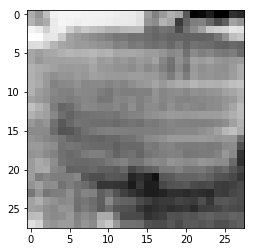

In [8]:
# test the neural network with our own images
item = 2567
matplotlib.pyplot.imshow(test_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')
correct_label = test_dataset[item][0]
print(correct_label)
inputs = test_dataset[item][1:]
outputs = n.query(inputs)
print (outputs)
label = numpy.argmax(outputs)
print("network says ", label)
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

In [9]:
# test the neural network
scorecard = []
for record in test_dataset:
    # print(record)
    correct_label = int(record[0])
    inputs = test_dataset[item][1:]
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.041666666666666664
